
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Regresión Lineal
* Regularización
* Selección de Características
* Reducción de Dimensionalidad

# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Se debe informar de cambios en la composición de los equipos:


> ```
https://docs.google.com/spreadsheets/d/1mG5Xnl7RghI_8FVKGujrW5TAD5b6Yza_GvnquMLzaZE/edit?usp=sharing
```






* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 


> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 11 de Noviembre, horario de clases.
> * Fecha de entrega de vídeo: 12 de Noviembre 23:59 Hrs. (1 día después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 11 de Noviembre 08:00 (se pueden hacer actualizaciones hasta el 12 de Noviembre 23:59 Hrs.). 


## Conformidad etica

Nosotros declaramos que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas.En la pregunta de investigación, Lucio Fondon trabajo con la base de datos WeatherHistory.csv, Max Rosado trabajo con la base de datos kc_house_data y Victor Martinez trabajo con la base de datos Diamond Prices. En la pregunta desafio, Lucio Fondon trabajo en ello. 

# Parte 1. **Pregunta de Investigación**

Elegir acá: https://doodle.com/poll/qgw7h5xb72khqq9x?utm_source=poll&utm_medium=link


> **3. Regresión Polinomial:** Expandir un modelo de regresión lineal creando características polinomiales de alto orden reduce siempre el error de entrenamiento pero no necesariamente el error de predicción.

## link del video:

https://drive.google.com/file/d/1Z09nOvY7Dutoip6_mYL85-fBop9UBsD_/view?usp=drivesdk

# Regresión Polinomial

RMSE 15.908242501429998
r2 0.6386750054827146


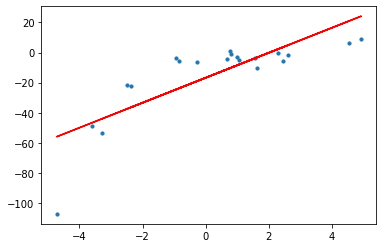

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)

print("RMSE", rmse)
print("r2", r2)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

El modelo anterior se puede modelar como:
$$
\boxed{y = \theta_0 + \theta_1x}
$$

Para poder aumentar la complejidad del modelo (y por ende, que se ajuste mejor a nuestros datos de entrenamiento), es posible transformar este modelo al siguiente:
$$
\boxed{y = \theta_0 + \theta_1x + \theta_2x^2}
$$

Y generalizando, es posible transformarse a:
$$
\boxed{y = \theta_0 + \theta_1x + \theta_2x^2 + \cdots + \theta_nx^{n} = \sum_{i=1}^n\theta_ix^i + \theta_0 } 
$$

RMSE 10.120437473614711
r2 0.8537647164420812


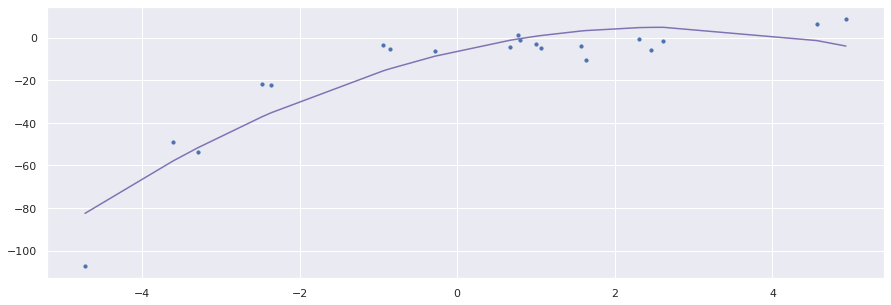

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE", rmse)
print("r2", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" alt="Alternative text" />

Fuente https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

# Dataset 1: Weather in Szeged 2006-2016
https://www.kaggle.com/datasets/budincsevity/szeged-weather

## EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [ ]:
df_weather = pd.read_csv('pregunta 1/weatherHistory.csv')
df_weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
# arreglamos el formato de fecha 
df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'].apply(lambda x: x.split('+')[0]) )
df_weather = df_weather.set_index('Formatted Date')     
df_weather = df_weather.sort_index()
df_weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
2016-12-31 20:00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
2016-12-31 21:00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [ ]:
df_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df_weather.dtypes.value_counts()

float64    8
object     3
dtype: int64

In [ ]:
print(df_weather['Summary'].unique())
cant_summary = len(df_weather['Summary'].unique())
print(f'Hay {cant_summary} valores únicos del resumen del clima')

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Breezy and Dry' 'Dry and Mostly Cloudy'
 'Light Rain' 'Drizzle' 'Windy and Dry' 'Rain']
Hay 27 valores únicos del resumen del clima


In [ ]:
df_weather['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
df_weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df_weather['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

La columna "Loud Cover" solo contiene ceros, por lo que la eliminaremos al no entregar información diferenciadora. También, eliminaremos la columna "Daily Summary", ya que contiene información del día en general, y queremos predecir para cada fecha y hora

In [ ]:
df_weather = df_weather.drop('Loud Cover', axis=1)
df_weather = df_weather.drop('Daily Summary', axis=1)
df_weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,,
2006-01-01 00:00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98
...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03
2016-12-31 20:00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27
2016-12-31 21:00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50


Realizaremos un pairplot de las columnas cuantitativas para ver como se comportan entre ellas

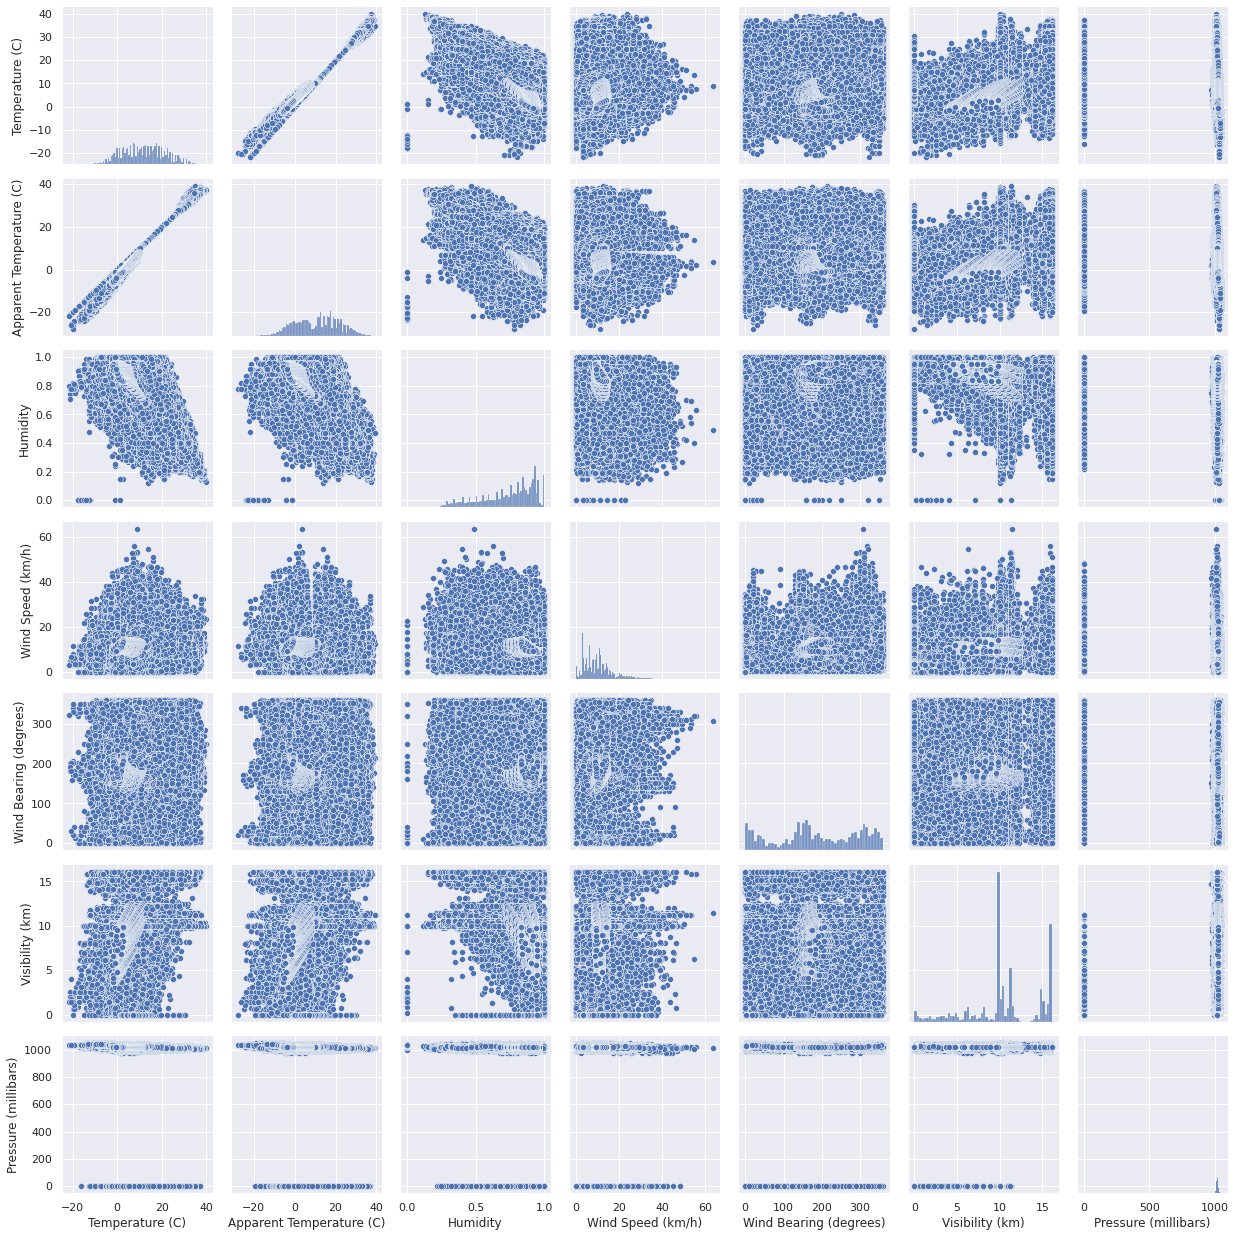

In [ ]:
quantitative_columns = ['Temperature (C)', 'Apparent Temperature (C)', 
                        'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                       'Visibility (km)', 'Pressure (millibars)']
df_w= df_weather[quantitative_columns]
df_w.reset_index(drop=False, inplace = True)
sns.pairplot(df_w)

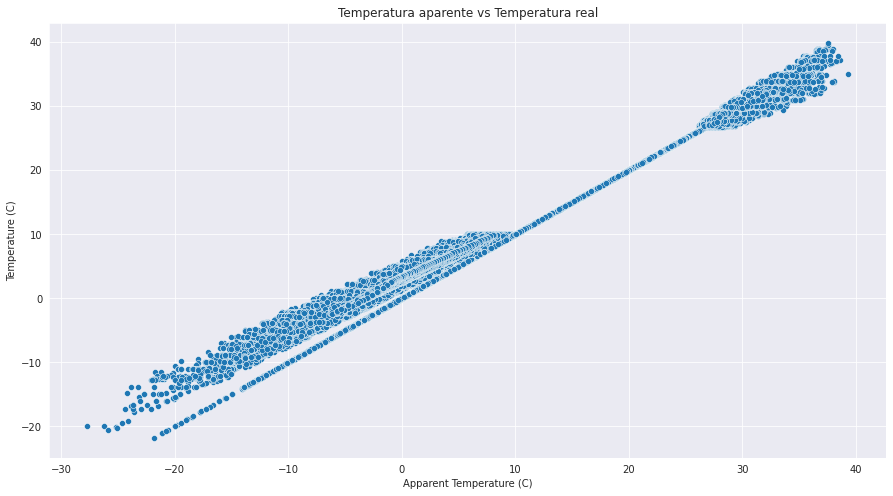

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Apparent Temperature (C)', y='Temperature (C)', data=df_weather)
plt.title('Temperatura aparente vs Temperatura real')
plt.show()

La temperatura aparante viene dada por la temperatura real (mantienen una relación bastante lineal), por lo que se sacará del dataset, ya que predeciremos la temperatura real

In [ ]:
df_weather = df_weather.drop('Apparent Temperature (C)', axis=1)

## Preprocesamiento
* Borramos los datos nulos
* Para las variables categóricas __Summary y Precip Type__ usaremos dummy encode para transformarlas a columnas numéricas
* Para las demás variables, se normalizarán los datos antes de pasarlos al modelo de regresión

In [ ]:
# obtenemos los dummies de las columnas categóricas
df_weather_dummy = pd.get_dummies(df_weather, prefix={'Summary':'Summary', 
                                      'Precip Type':'Precip Type'},
                          drop_first=True)

In [ ]:
df_weather_dummy

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
Formatted Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,0.577778,0.89,17.1143,140.0,9.9820,1016.66,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2006-01-01 01:00:00,1.161111,0.85,16.6152,139.0,9.9015,1016.15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-01-01 02:00:00,1.666667,0.82,20.2538,140.0,9.9015,1015.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-01-01 03:00:00,1.711111,0.82,14.4900,140.0,9.9015,1015.56,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2006-01-01 04:00:00,1.183333,0.86,13.9426,134.0,9.9015,1014.98,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.488889,0.86,9.7566,167.0,8.0178,1020.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 20:00:00,0.072222,0.88,9.4185,169.0,7.2450,1020.27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-31 21:00:00,-0.233333,0.89,9.2736,175.0,9.5795,1020.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# quitamos columna target del dataset completo y la dejamos aparte
y = df_weather_dummy['Temperature (C)']
X = df_weather_dummy.drop('Temperature (C)', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def process_dataset(X, y, poly=False, alpha=1):
    # columnas numéricas
    numerical_columns = [ 'Wind Speed (km/h)', 
                             'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
    # si poly es true, aplica Polynomial features
    if poly == True: 
        polynomial_features = PolynomialFeatures(degree=alpha, include_bias=False) # alpha es grado del polinomio
        
        # columnas restantes
        columns_left = list(set(X.columns) - set(numerical_columns))

        X_poly_numerical_features = polynomial_features.fit_transform(X[numerical_columns]) # fit transform

        # nombre de las columnas polinomiales    
        cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(numerical_columns,p) for p in polynomial_features.powers_]]

        X_poly_numerical_features = pd.DataFrame(X_poly_numerical_features, 
                                          columns=cont_predictors_names, index=list(X.index))
        X = pd.concat([X_poly_numerical_features, X[columns_left]], axis=1).reindex(X.index)

        # separamos datasets en train, validación y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

        # escalamiento normalizacion N(0,1)
        scaler = StandardScaler()
        X_train[cont_predictors_names] = scaler.fit_transform(X_train[cont_predictors_names]) # fit transform
        X_val[cont_predictors_names] = scaler.transform(X_val[cont_predictors_names]) # solo transform
        X_test[cont_predictors_names] = scaler.transform(X_test[cont_predictors_names]) # solo transform

    
    else:
        # separamos datasets en train, validación y test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
        
        # escalamiento normalizacion N(0,1)
        scaler = StandardScaler()
        X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns]) # fit transform
        X_val[numerical_columns] = scaler.transform(X_val[numerical_columns]) # solo transform
        X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]) # solo transform
        
    # chequeo dimensiones
    print("X,y Shapes:", X.shape, y.shape)
    print("X,y Train Shapes:", X_train.shape, y_train.shape)
    print("X,y Val Shapes:", X_val.shape, y_val.shape)
    print("X,y Test Shapes:", X_test.shape, y_test.shape)
    
    return X_train, y_train, X_val, y_val, X_test, y_test


## Modelamiento

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def linear_regression(X_train, y_train, X_val, y_val, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predicciones para train
    y_train_pred = lr.predict(X_train)
    
    # scores train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    print(f' R^2 train score: {r2_train}')
    print(f' RMSE train score: {rmse_train}')
    print("")

    # predicciones para validacion
    y_val_pred = lr.predict(X_val)
    
    # scores validación
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
    
    print(f' R^2 validación score: {r2_val}')
    print(f' RMSE validación score: {rmse_val}')
    print("")

    # predicciones para test
    y_test_pred = lr.predict(X_test)
    
    # scores test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    print(f' R^2 test score: {r2_test}')
    print(f' RMSE test score: {rmse_test}')
    print("")
    
    return [(r2_train, rmse_train), (r2_val, rmse_val), (r2_test, rmse_test)]

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = process_dataset(X,y)
linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)

X,y Shapes: (96453, 32) (96453,)
X,y Train Shapes: (61729, 32) (61729,)
X,y Val Shapes: (15433, 32) (15433,)
X,y Test Shapes: (19291, 32) (19291,)
 R^2 train score: 0.6134038192329414
 RMSE train score: 5.931193357387834

 R^2 validación score: 0.6160101837976303
 RMSE validación score: 5.939376687211858

 R^2 test score: 0.6133462711752858
 RMSE test score: 5.947008890494477



[(0.6134038192329414, 5.931193357387834),
 (0.6160101837976303, 5.939376687211858),
 (0.6133462711752858, 5.947008890494477)]

In [ ]:
# probaremos con polinomios de gra
# probando con numeros del 1 al 10
alphas = list(np.arange(1, 10 + 1, 1, dtype=int))
print(alphas)


scores_r2 = []
scores_rmse = []

for alpha in alphas:
    print(f"alpha = {alpha}")
    X_train, y_train, X_val, y_val, X_test, y_test = process_dataset(X,y, poly=True, alpha=alpha)
    s_train, s_valid, s_test = linear_regression(X_train, y_train, X_val, y_val, X_test, y_test)
    
    scores_r2.append((s_train[0], s_valid[0], s_test[0]))
    scores_rmse.append((s_train[1], s_valid[1], s_test[1]))
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
alpha = 1
X,y Shapes: (96453, 32) (96453,)
X,y Train Shapes: (61729, 32) (61729,)
X,y Val Shapes: (15433, 32) (15433,)
X,y Test Shapes: (19291, 32) (19291,)
 R^2 train score: 0.6134038192329414
 RMSE train score: 5.931193357387834

 R^2 validación score: 0.6160101837976303
 RMSE validación score: 5.939376687211858

 R^2 test score: 0.6133462711752858
 RMSE test score: 5.947008890494477

alpha = 2
X,y Shapes: (96453, 42) (96453,)
X,y Train Shapes: (61729, 42) (61729,)
X,y Val Shapes: (15433, 42) (15433,)
X,y Test Shapes: (19291, 42) (19291,)
 R^2 train score: 0.6598092021394455
 RMSE train score: 5.563839373846463

 R^2 validación score: 0.6602043695126542
 RMSE validación score: 5.587144602680045

 R^2 test score: 0.6601697198808899
 RMSE test score: 5.575303618828569

alpha = 3
X,y Shapes: (96453, 62) (96453,)
X,y Train Shapes: (61729, 62) (61729,)
X,y Val Shapes: (15433, 62) (15433,)
X,y Test Shapes: (19291, 62) (19291,)
 R^2 train score: 0.67808125635

In [ ]:
print(scores_r2)

[(0.6134038192329414, 0.6160101837976303, 0.6133462711752858), (0.6598092021394455, 0.6602043695126542, 0.6601697198808899), (0.6780812563503504, 0.6792895196255819, 0.6801625673120124), (0.688432042834527, 0.6911730523073472, 0.6903075404179522), (0.6951905167774161, 0.6967214184527181, 0.697489960839272), (0.6986620746719447, 0.699331547658945, 0.7008745977115401), (0.7021034147828757, 0.7015923928202827, 0.7031789511355688), (0.7050562593226319, 0.6882900870651485, 0.7005236530448178), (0.7067514413949595, 0.6492931300914746, 0.7023849889365346), (0.7091885460589766, 0.27559583187089376, 0.6226168983300557)]


In [ ]:
def plot_scores(scores, score_type):
    scores_df = pd.DataFrame(alphas)
        
    if score_type == 'r2':
        scores_df['s_r2_train'] = [s[0] for s in scores]
        scores_df['s_r2_val'] = [s[1] for s in scores]
        scores_df['s_r2_test'] = [s[2] for s in scores]
        
    if score_type == 'rmse':
        scores_df['s_rmse_train'] = [s[0] for s in scores]
        scores_df['s_rmse_val'] = [s[1] for s in scores]
        scores_df['s_rmse_test'] = [s[2] for s in scores]   


    scores_df.rename(columns = {0:'alpha'}, inplace = True)
    scores_df = scores_df.set_index('alpha')

    display(scores_df)

    # plot using lineplot
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(15,5)})
    plt.ylabel(f"{score_type} scores")
    plt.title(f'{score_type.capitalize()} score variation of polynomial features')
    sns.lineplot(data=scores_df)
    plt.show()

,s_r2_train,s_r2_val,s_r2_test
alpha,,,
1,0.613404,0.616010,0.613346
2,0.659809,0.660204,0.660170
3,0.678081,0.679290,0.680163
4,0.688432,0.691173,0.690308
5,0.695191,0.696721,0.697490
6,0.698662,0.699332,0.700875
7,0.702103,0.701592,0.703179
8,0.705056,0.688290,0.700524
9,0.706751,0.649293,0.702385


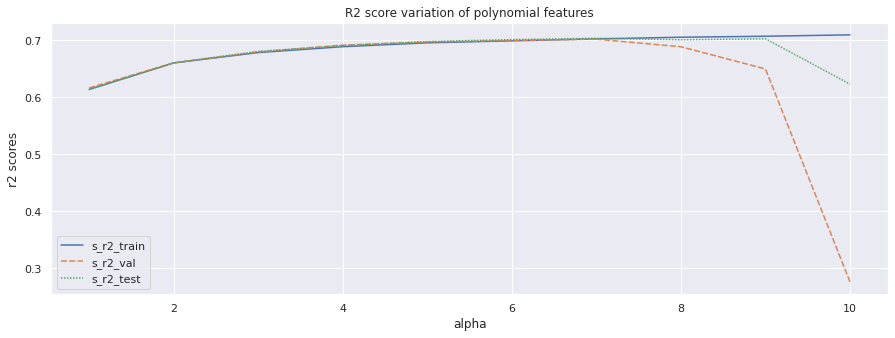

In [ ]:
plot_scores(scores_r2, 'r2')

,s_rmse_train,s_rmse_val,s_rmse_test
alpha,,,
1,5.931193,5.939377,5.947009
2,5.563839,5.587145,5.575304
3,5.412357,5.427972,5.408815
4,5.324633,5.326459,5.322342
5,5.266566,5.278395,5.260262
6,5.236489,5.255632,5.230752
7,5.206502,5.235835,5.210565
8,5.180634,5.351263,5.233820
9,5.165725,5.676141,5.217529


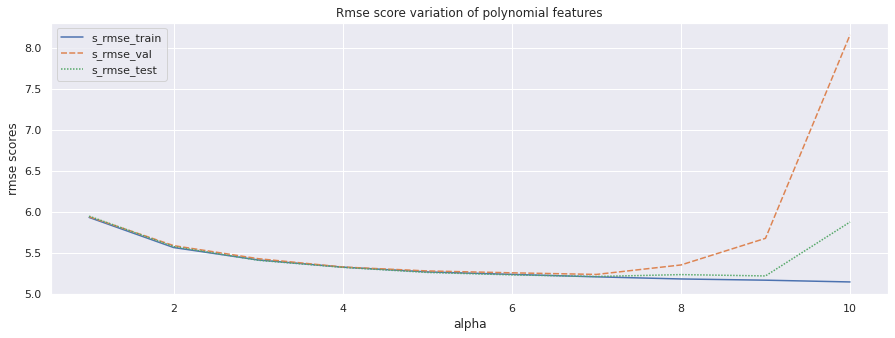

In [ ]:
plot_scores(scores_rmse, 'rmse')

# Dataset 2: Price of Houses in Seatle

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [ ]:
datos=pd.read_csv("pregunta 1/kc_house_data.csv")
datos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
datos.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
datos.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [ ]:
datos['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [ ]:
print(datos['id'].unique())
cant_summary = len(datos['id'].unique())
print(f'Hay {cant_summary} id únicos en este dataframe')

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
Hay 21436 id únicos en este dataframe


In [ ]:
datos['date'].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64

In [ ]:
print(datos['date'].unique())
cant_summary = len(datos['date'].unique())
print(f'Hay {cant_summary} fechas únicas en este dataframe')

['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '20150407T000000' '20140827T000000'
 '20150223T000000' '20141210T000000' '20140828T0000

In [ ]:
datos['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [ ]:
print(datos['price'].unique())
cant_summary = len(datos['price'].unique())
print(f'Hay {cant_summary} precios únicas en este dataframe')

[ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
Hay 4028 precios únicas en este dataframe


In [ ]:
datos['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
print(datos['bedrooms'].unique())
cant_summary = len(datos['bedrooms'].unique())
print(f'Hay {cant_summary} cantidades únicas de cuartos en este dataframe')

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
Hay 13 cantidades únicas de cuartos en este dataframe


In [ ]:
datos['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
print(datos['bathrooms'].unique())
cant_summary = len(datos['bathrooms'].unique())
print(f'Hay {cant_summary} cantidades únicas de baños en este dataframe')

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
Hay 30 cantidades únicas de baños en este dataframe


In [ ]:
datos['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

In [ ]:
print(datos['sqft_living'].unique())
cant_summary = len(datos['sqft_living'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_living en este dataframe')

[1180 2570  770 ... 3087 3118 1425]
Hay 1038 clases únicas en la columna sqft_living en este dataframe


In [ ]:
datos['sqft_lot'].value_counts()

5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
25248      1
9934       1
9142       1
24330      1
1076       1
Name: sqft_lot, Length: 9782, dtype: int64

In [ ]:
print(datos['sqft_lot'].unique())
cant_summary = len(datos['sqft_lot'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_lot en este dataframe')

[ 5650  7242 10000 ...  5813  2388  1076]
Hay 9782 clases únicas en la columna sqft_lot en este dataframe


In [ ]:
datos['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [ ]:
print(datos['floors'].unique())
cant_summary = len(datos['floors'].unique())
print(f'Hay {cant_summary} clases únicas en la columna floors en este dataframe')

[1.  2.  1.5 3.  2.5 3.5]
Hay 6 clases únicas en la columna floors en este dataframe


In [ ]:
datos['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
print(datos['waterfront'].unique())
cant_summary = len(datos['waterfront'].unique())
print(f'Hay {cant_summary} clases únicas en la columna waterfront en este dataframe')

[0 1]
Hay 2 clases únicas en la columna waterfront en este dataframe


In [ ]:
datos['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
print(datos['view'].unique())
cant_summary = len(datos['view'].unique())
print(f'Hay {cant_summary} clases únicas en la columna view en este dataframe')

[0 3 4 2 1]
Hay 5 clases únicas en la columna view en este dataframe


In [ ]:
datos['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
print(datos['condition'].unique())
cant_summary = len(datos['condition'].unique())
print(f'Hay {cant_summary} clases únicas en la columna condidtion en este dataframe')

[3 5 4 1 2]
Hay 5 clases únicas en la columna condidtion en este dataframe


In [ ]:
datos['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [ ]:
print(datos['grade'].unique())
cant_summary = len(datos['grade'].unique())
print(f'Hay {cant_summary} clases únicas en la columna grade en este dataframe')

[ 7  6  8 11  9  5 10 12  4  3 13  1]
Hay 12 clases únicas en la columna grade en este dataframe


In [ ]:
datos['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 946, dtype: int64

In [ ]:
print(datos['sqft_above'].unique())
cant_summary = len(datos['sqft_above'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_above en este dataframe')

[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1720 2910 1620
 1360 2070 2460 1390 2140 1320 1340 1550  940 1380 3670 2370 1130  980
 3540 2500 1760 1030 1780 3400 2680 1670 2590  820 1220 2440 2090 1100
 1330 1420 1690 2150 1910 1350 1940  900 1630 2714  850 1870 1950 2760
 2020 1120 1480 1230 2280 3760 3530  830 1300 2740 1830  720 2010 3360
  800 1730  760 1700 4750 5310  580 2653 2850 2210 2630 3500 1740 1140
 2160 2650  970 2040 2180 2220 1660 3370 2690 1930 3150 3030 2050 2490
 2560 1275 2580  560 1820 1840 2990 3230 1580 3480 2510 1410 2120 3300
 3840 

In [ ]:
datos['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
print(datos['sqft_basement'].unique())
cant_summary = len(datos['sqft_basement'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_basement en este dataframe')

[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  380  710  840  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
 1100  280  870  460 1400 1320  660 1220  900  420 1580 1380  475  690
  270  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470
  370  140 1760  130  610  520  890 1110  150 1720  810  190 1290  670
 1800 1120 1810   60 1050  940  310  930 1390 1830 1300  510 1330 1590
  920 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 2590 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520
 1850 1660 2130 2600 1690  243 1210 2620 1024 1798 1610 1440 1570 1650
  704 

In [ ]:
datos['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [ ]:
print(datos['yr_built'].unique())
cant_summary = len(datos['yr_built'].unique())
print(f'Hay {cant_summary} clases únicas en la columna yr_built en este dataframe')

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
Hay 116 clases únicas en la columna yr_built en este dataframe


In [ ]:
datos['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
print(datos['yr_renovated'].unique())
cant_summary = len(datos['yr_renovated'].unique())
print(f'Hay {cant_summary} clases únicas en la columna yr_renovated en este dataframe')

[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
Hay 70 clases únicas en la columna yr_renovated en este dataframe


In [ ]:
datos['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
print(datos['zipcode'].unique())
cant_summary = len(datos['zipcode'].unique())
print(f'Hay {cant_summary} clases únicas en la columna zipcode en este dataframe')

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
Hay 70 clases únicas en la columna zipcode en este dataframe


In [ ]:
datos['lat'].value_counts()

47.6624    17
47.5322    17
47.6846    17
47.5491    17
47.6955    16
           ..
47.6139     1
47.4184     1
47.4387     1
47.7526     1
47.6502     1
Name: lat, Length: 5034, dtype: int64

In [ ]:
print(datos['lat'].unique())
cant_summary = len(datos['lat'].unique())
print(f'Hay {cant_summary} clases únicas en la columna lat en este dataframe')

[47.5112 47.721  47.7379 ... 47.3906 47.3339 47.6502]
Hay 5034 clases únicas en la columna lat en este dataframe


In [ ]:
datos['long'].value_counts()

-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.363     99
           ... 
-121.691      1
-122.514      1
-121.646      1
-122.515      1
-121.403      1
Name: long, Length: 752, dtype: int64

In [ ]:
print(datos['long'].unique())
cant_summary = len(datos['long'].unique())
print(f'Hay {cant_summary} clases únicas en la columna long en este dataframe')

[-122.257 -122.319 -122.233 -122.393 -122.045 -122.005 -122.327 -122.315
 -122.337 -122.031 -122.145 -122.292 -122.229 -122.394 -122.375 -121.962
 -122.343 -122.21  -122.306 -122.341 -122.169 -122.166 -122.172 -122.218
 -122.36  -122.314 -122.304 -122.11  -122.07  -122.357 -122.368 -122.157
 -122.31  -122.132 -122.362 -122.282 -122.18  -122.027 -122.347 -122.016
 -122.364 -122.175 -121.977 -122.371 -122.151 -122.301 -122.451 -122.322
 -122.189 -122.384 -122.369 -122.281 -122.29  -122.114 -122.122 -122.116
 -122.149 -122.339 -122.335 -122.344 -122.32  -122.297 -122.192 -122.215
 -122.16  -122.179 -122.287 -122.036 -122.073 -121.987 -122.125 -122.34
 -122.025 -122.008 -122.291 -122.365 -122.199 -122.194 -122.387 -122.372
 -122.391 -122.351 -122.386 -122.249 -122.277 -122.378 -121.958 -121.714
 -122.08  -122.196 -122.184 -122.133 -122.38  -122.082 -122.109 -122.053
 -122.349 -122.295 -122.253 -122.248 -122.303 -122.294 -122.226 -122.266
 -122.098 -122.212 -122.244 -122.39  -122.352 -121.8

In [ ]:
datos['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
2054      1
3736      1
4950      1
2728      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [ ]:
print(datos['sqft_living15'].unique())
cant_summary = len(datos['sqft_living15'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_living15 en este dataframe')

[1340 1690 2720 1360 1800 4760 2238 1650 1780 2390 2210 1330 1370 2140
 1890 1610 1060 1280 1400 4110 2240 1220 2200 1030 1760 1860 1520 2630
 2580 1390 1460 1570 2020 1590 2160 1730 1290 2620 2470 2410 3625 1580
 3050 1228 2680  970 1190 1990 1410 1480 2730 1950 2250 2690 2960 2270
 2570 2500 1440 2750 2221 1010 3390 3530 1640 1510 2420 1940 3240 1680
  890 1130 3350 2350 1870 1720 1850 1900 1980 2520 1350 1750 1160 2550
 2370 1240 1270 2990 1380 1540 2090 2640 1830 1620 1880 2340 1710 2700
 3060 2660 1700 1970 1420 2060 2480 1550 1170 2820 1560 2230 2840 1450
 1500 3160 1200 3400 2110 2920 1770 1070 1930 3740 2260 1670 2290 1050
 2540 2190 2030 1230 2330 1300 1430 2770 1250 1630 2590 2130 1100 3836
 1320 2120 3070 1910 2080 1960 2280 1150 3430 2070 2600  830 1260 3120
 2010 1660 1600 2380 3890 4180 2653 2670 3920 2300 2310 2320 3150 1740
 2400 4550 2510 2440 2880 3860 2150 1310 1820 3080  880 2560 3470 1020
 2040 2610 1810 2860 3480 3130 3360 4050 2450 1790 3180 3600 2000 2430
 2850 

In [ ]:
datos['sqft_lot15'].value_counts()

5000     427
4000     357
6000     289
7200     211
4800     145
        ... 
25927      1
35943      1
5107       1
1514       1
2007       1
Name: sqft_lot15, Length: 8689, dtype: int64

In [ ]:
print(datos['sqft_lot15'].unique())
cant_summary = len(datos['sqft_lot15'].unique())
print(f'Hay {cant_summary} clases únicas en la columna sqft_lot15 en este dataframe')

[5650 7639 8062 ... 5731 1509 2007]
Hay 8689 clases únicas en la columna sqft_lot15 en este dataframe


media price:  540088.1417665294


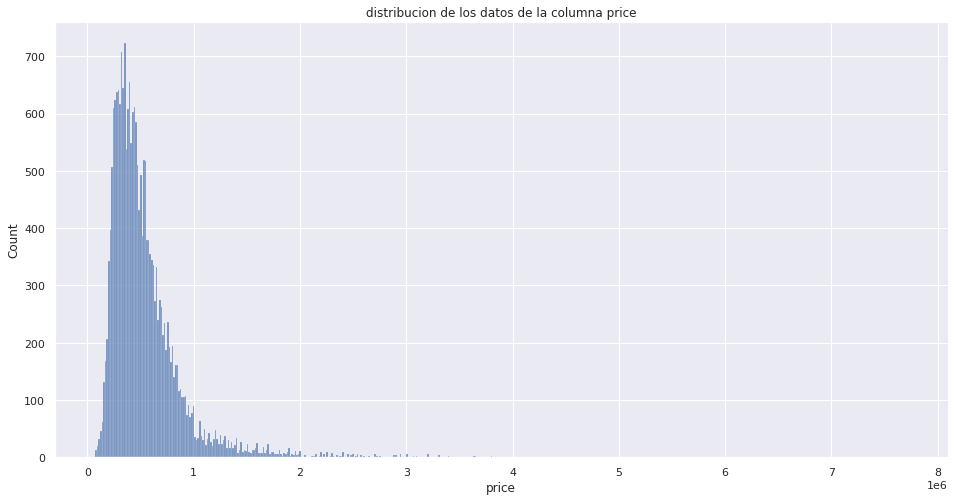

In [ ]:
#analisis de la distribucion de las columnas de los datos
print("media price: ",datos.price.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.price, binwidth=15000)
plt.title('distribucion de los datos de la columna price')
plt.show()

media bedrooms:  3.37084162309721


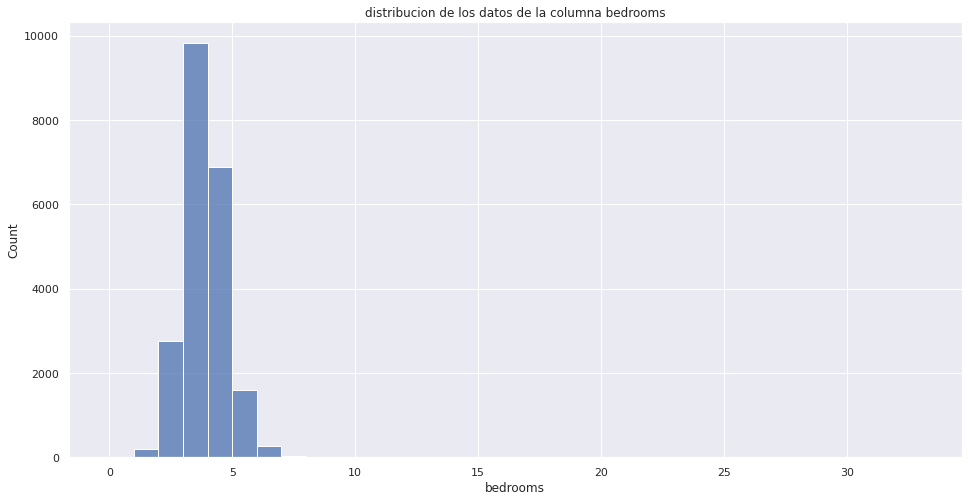

In [ ]:
print("media bedrooms: ",datos.bedrooms.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.bedrooms, binwidth=1)
plt.title('distribucion de los datos de la columna bedrooms')
plt.show()

media bathrooms:  2.1147573219821405


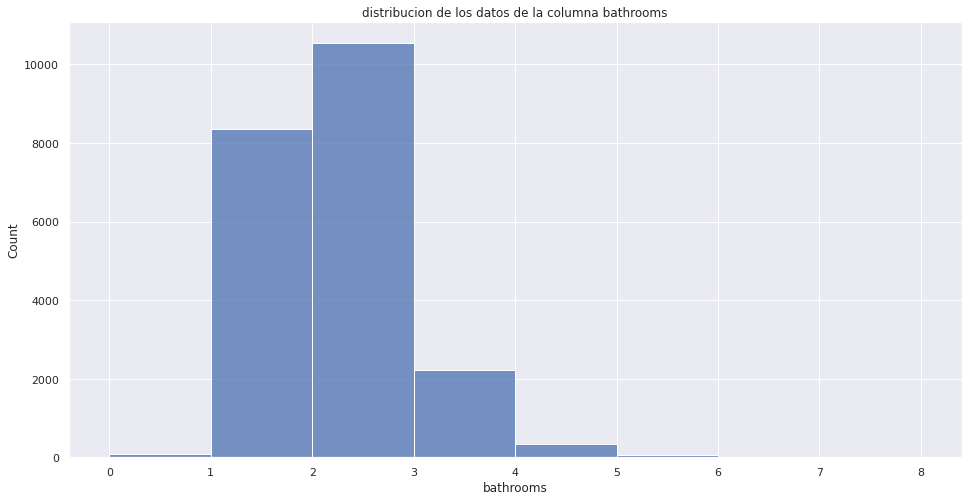

In [ ]:
print("media bathrooms: ", datos.bathrooms.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.bathrooms, binwidth=1)
plt.title('distribucion de los datos de la columna bathrooms')
plt.show()

media sqft_living:  2079.8997362698374


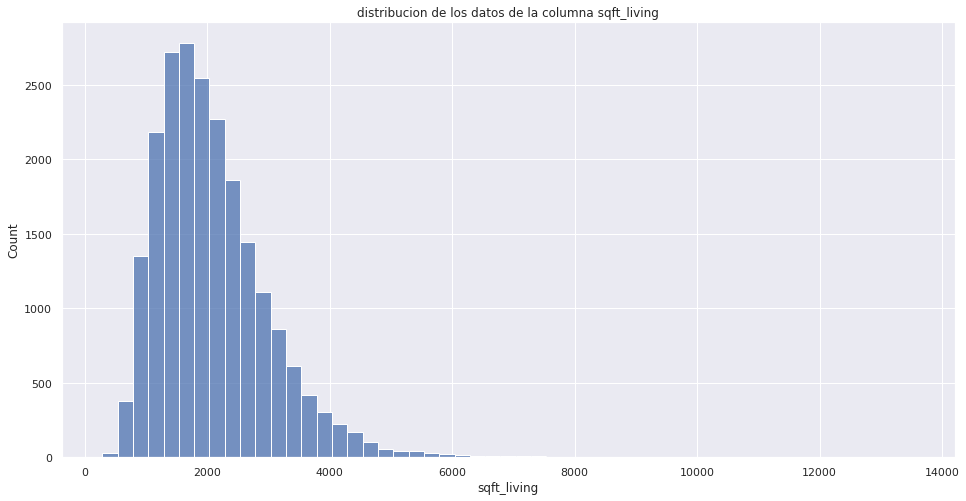

In [ ]:
print("media sqft_living: ", datos.sqft_living.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_living, binwidth=250)
plt.title('distribucion de los datos de la columna sqft_living')
plt.show()

media sqft_lot:  15106.967565816869


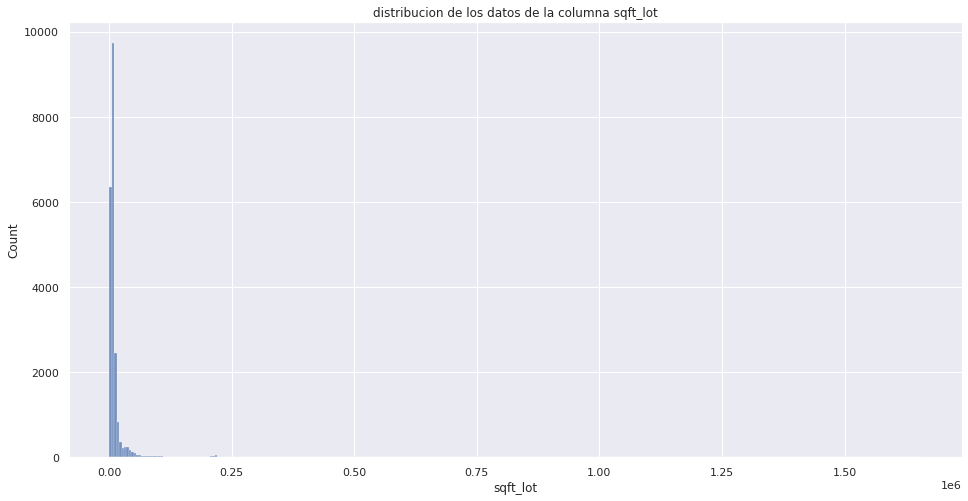

In [ ]:
print("media sqft_lot: ", datos.sqft_lot.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_lot, binwidth=5000)
plt.title('distribucion de los datos de la columna sqft_lot')
plt.show()

media floors:  1.4943089807060566


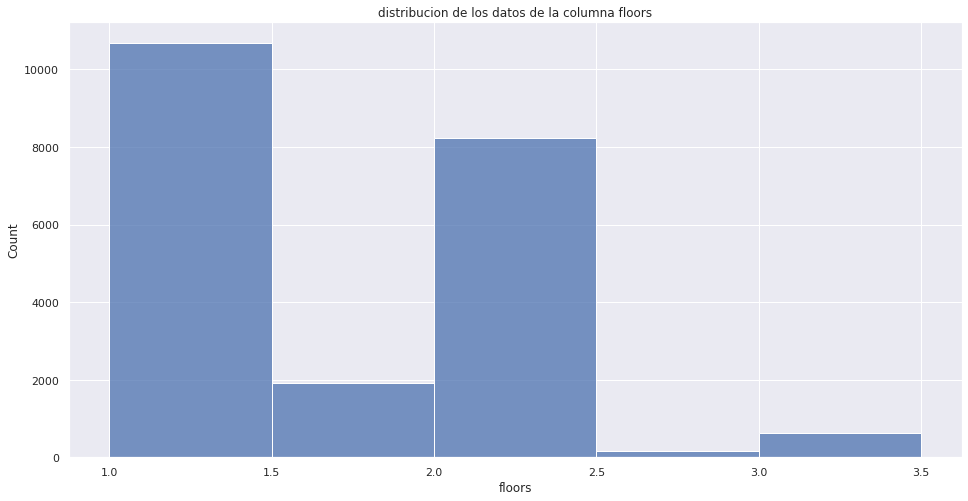

In [ ]:
print("media floors: ", datos.floors.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.floors, binwidth=0.5)
plt.title('distribucion de los datos de la columna floors')
plt.show()

media waterfront:  0.007541757275713691


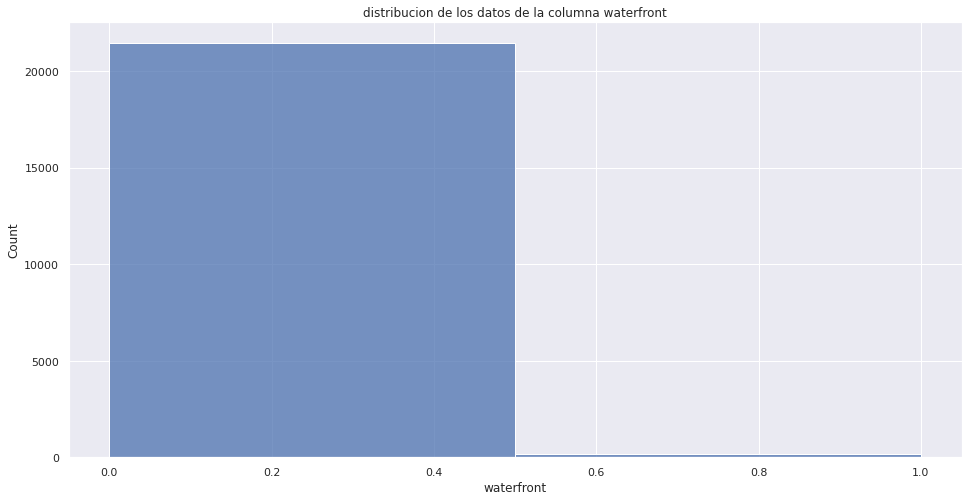

In [ ]:
print("media waterfront: ", datos.waterfront.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.waterfront, binwidth=0.5)
plt.title('distribucion de los datos de la columna waterfront')
plt.show()

media view:  0.23430342849211122


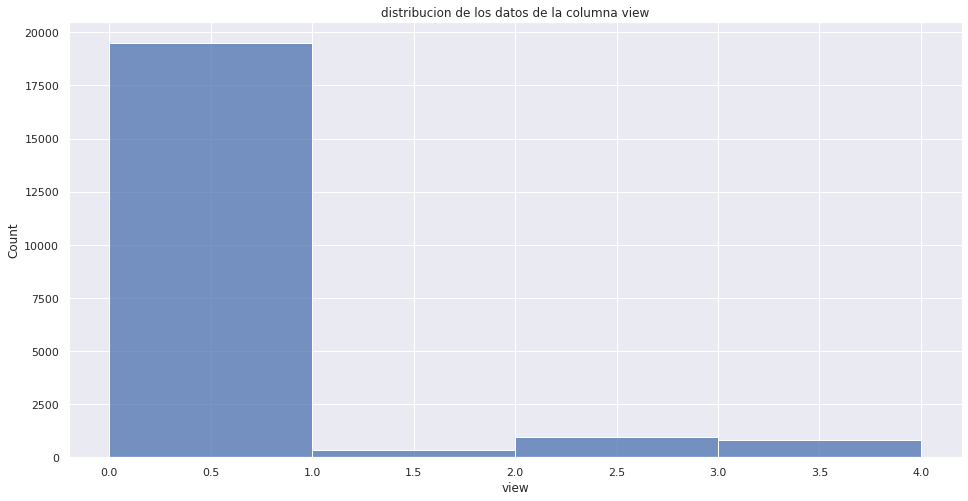

In [ ]:
print("media view: ", datos.view.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.view, binwidth=1)
plt.title('distribucion de los datos de la columna view')
plt.show()

media condition:  3.4094295100171195


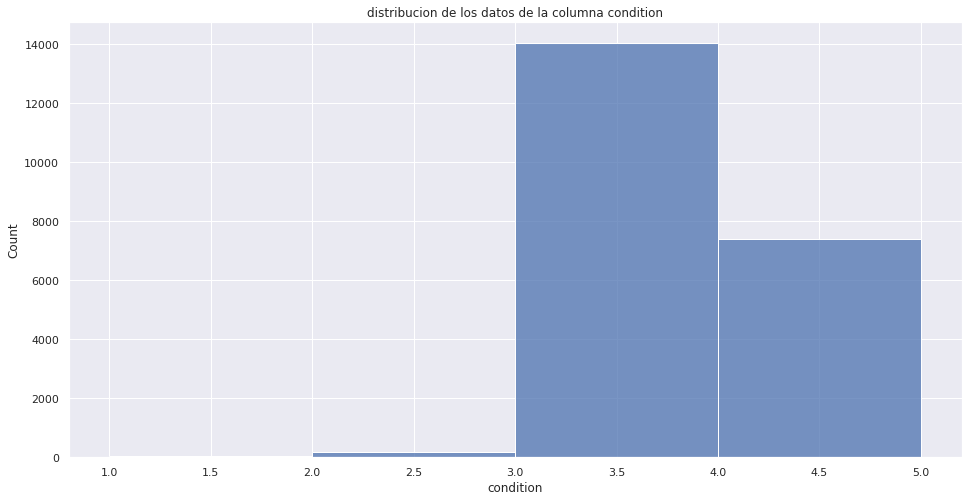

In [ ]:
print("media condition: ", datos.condition.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.condition, binwidth=1)
plt.title('distribucion de los datos de la columna condition')
plt.show()

media grade:  7.656873178179799


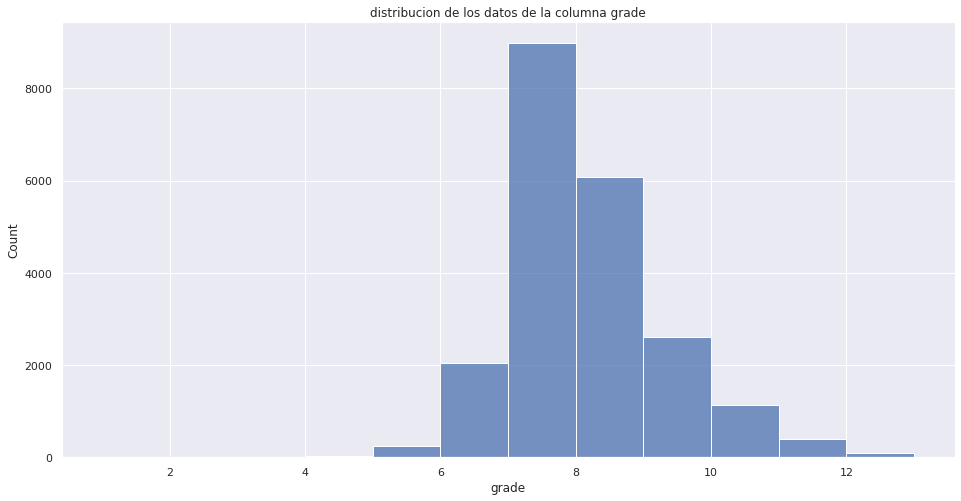

In [ ]:
print("media grade: ", datos.grade.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.grade, binwidth=1)
plt.title('distribucion de los datos de la columna grade')
plt.show()

media sqft_above:  1788.3906907879516


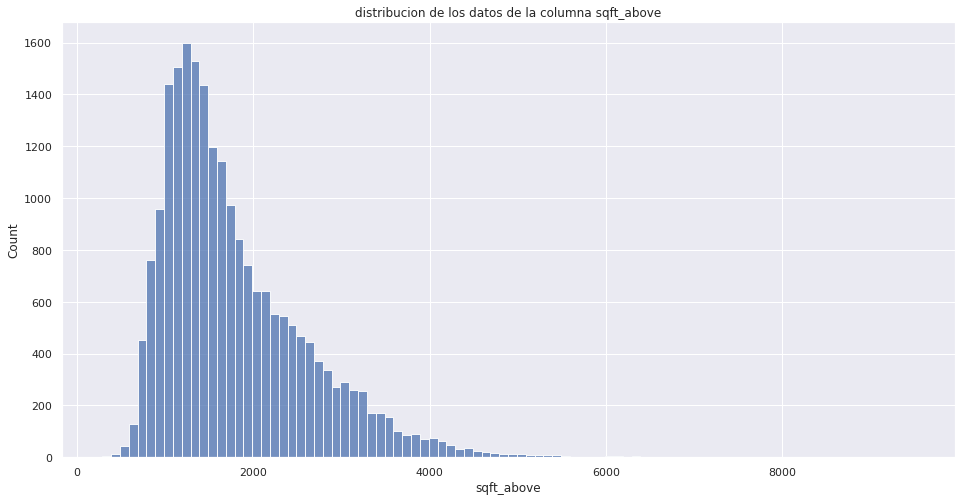

In [ ]:
print("media sqft_above: ", datos.sqft_above.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_above, binwidth=100)
plt.title('distribucion de los datos de la columna sqft_above')
plt.show()

media sqft_basement:  291.5090454818859


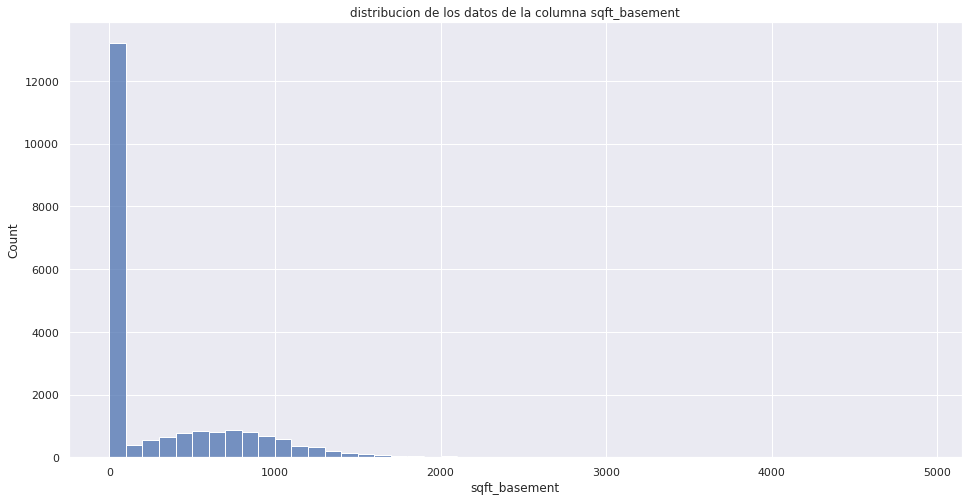

In [ ]:
print("media sqft_basement: ", datos.sqft_basement.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_basement, binwidth=100)
plt.title('distribucion de los datos de la columna sqft_basement')
plt.show()

media yr_built:  1971.0051357978994


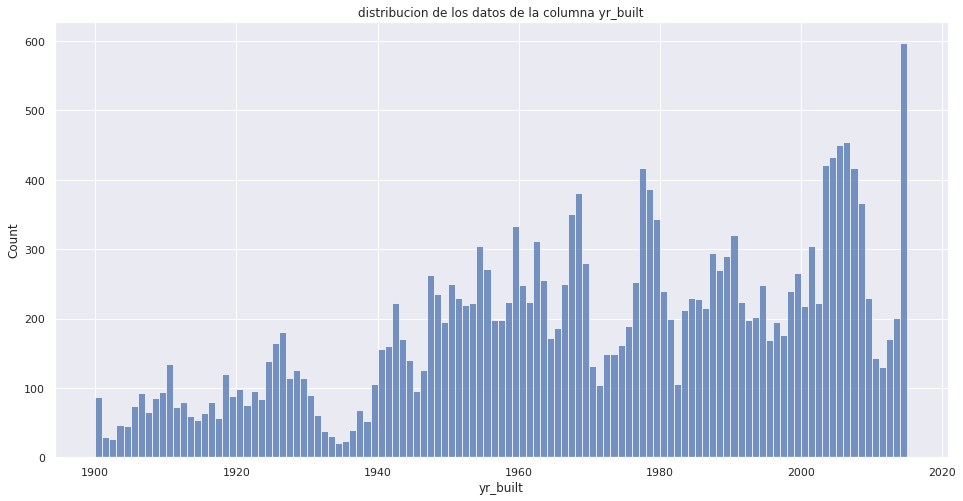

In [ ]:
print("media yr_built: ", datos.yr_built.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.yr_built, binwidth=1)
plt.title('distribucion de los datos de la columna yr_built')
plt.show()

media yr_renovated:  84.40225790033776


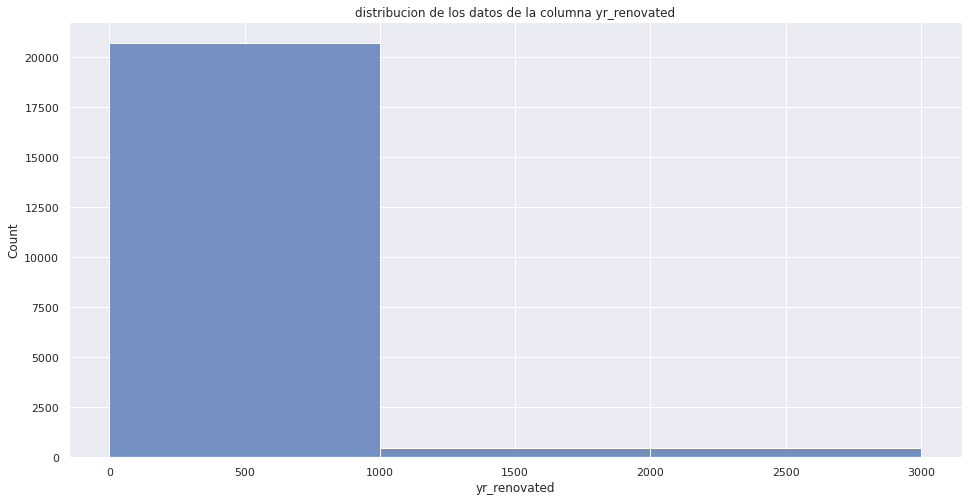

In [ ]:
print("media yr_renovated: ", datos.yr_renovated.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.yr_renovated, binwidth=1000)
plt.title('distribucion de los datos de la columna yr_renovated')
plt.show()

media zipcode:  98077.93980474715


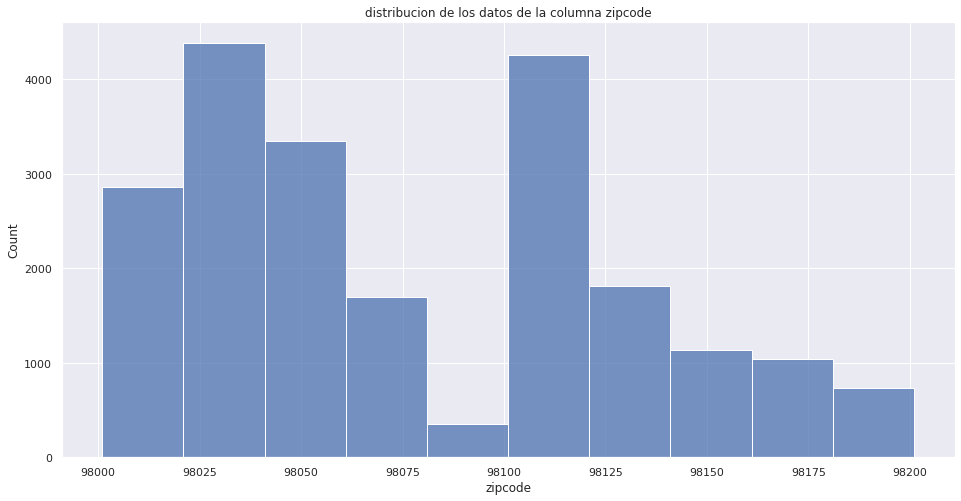

In [ ]:
print("media zipcode: ", datos.zipcode.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.zipcode, binwidth=20)
plt.title('distribucion de los datos de la columna zipcode')
plt.show()

media lat:  47.56005251931708


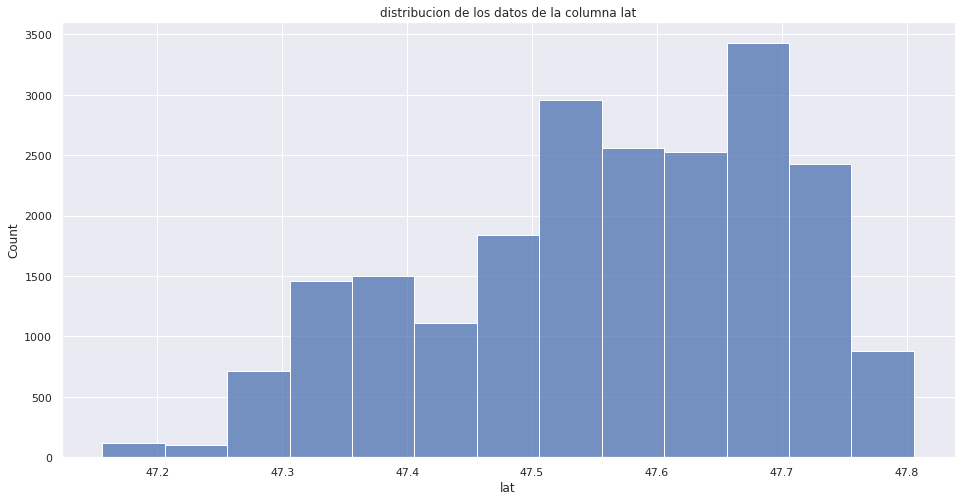

In [ ]:
print("media lat: ", datos.lat.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.lat, binwidth=0.05)
plt.title('distribucion de los datos de la columna lat')
plt.show()

media long:  -122.21389640494147


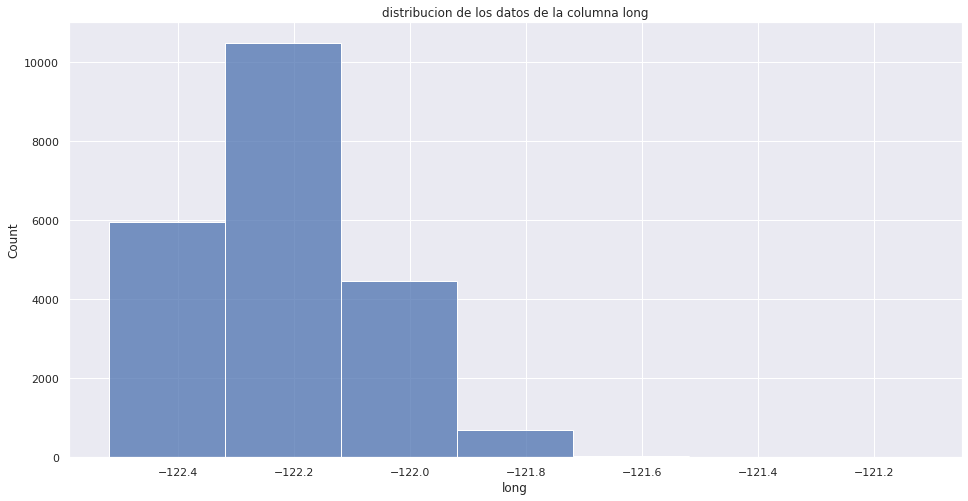

In [ ]:
print("media long: ", datos.long.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.long, binwidth=0.2)
plt.title('distribucion de los datos de la columna long')
plt.show()

media sqft_living15:  1986.552491556008


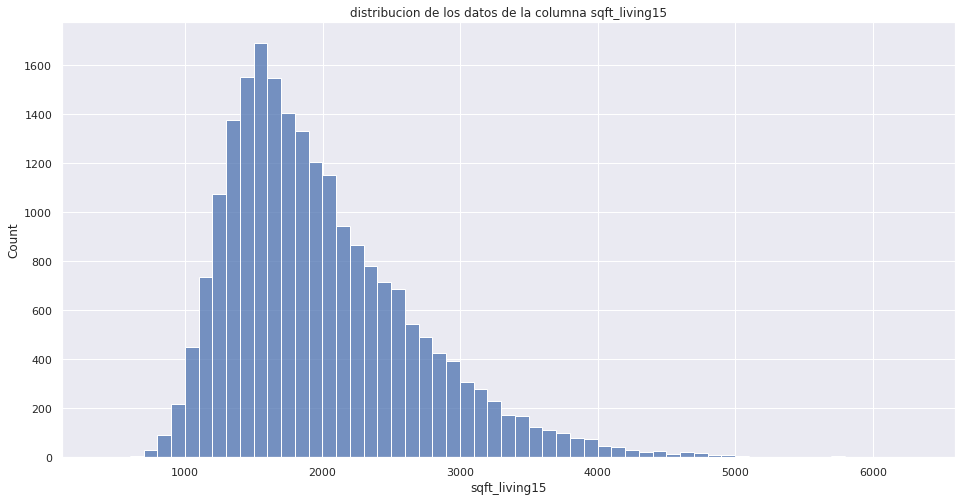

In [ ]:
print("media sqft_living15: ", datos.sqft_living15.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_living15, binwidth=100)
plt.title('distribucion de los datos de la columna sqft_living15')
plt.show()

media sqft_lot15:  12768.455651691113


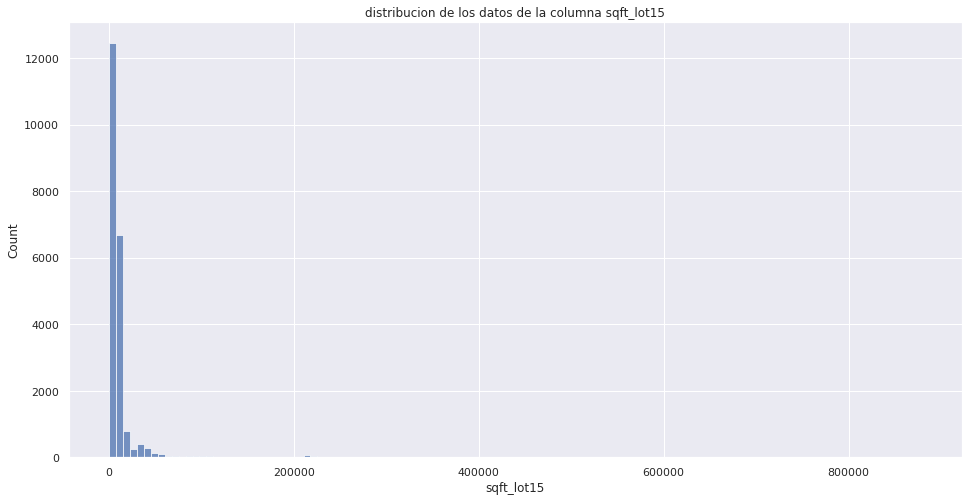

In [ ]:
print("media sqft_lot15: ", datos.sqft_lot15.mean())
plt.figure(figsize=(16, 8))
sns.histplot(datos.sqft_lot15, binwidth=7500)
plt.title('distribucion de los datos de la columna sqft_lot15')
plt.show()

In [ ]:
#datos de entrenamiento y de test
X=datos.copy()
X=X.drop(['id', 'date', 'price'], axis=1)
Y=datos.price
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#expandir una regresion polinomial a una regresion lineal usando todas las caracteristicas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

grado= [1, 2, 3, 4]

ECM_train= []
ECM_val= []
ECM_test= []
r2_train= []
r2_val= []
r2_test= []

for i in grado:
    poly_tem= PolynomialFeatures(degree=i, include_bias=False)
    poly_features= poly_tem.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.2, random_state=30)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=39)

    model_temp= LinearRegression()
    model_temp.fit(X_train, Y_train)
    print(X_train.shape)

    ECM_train.append(mean_squared_error(model_temp.predict(X_train), Y_train))
    r2_train.append(r2_score(model_temp.predict(X_train), Y_train))

    ECM_val.append(mean_squared_error(model_temp.predict(X_val), Y_val))
    r2_val.append(r2_score(model_temp.predict(X_val), Y_val))

    ECM_test.append(mean_squared_error(model_temp.predict(X_test), Y_test))
    r2_test.append(r2_score(model_temp.predict(X_test), Y_test))


(13832, 18)
(13832, 189)
(13832, 1329)
(13832, 7314)


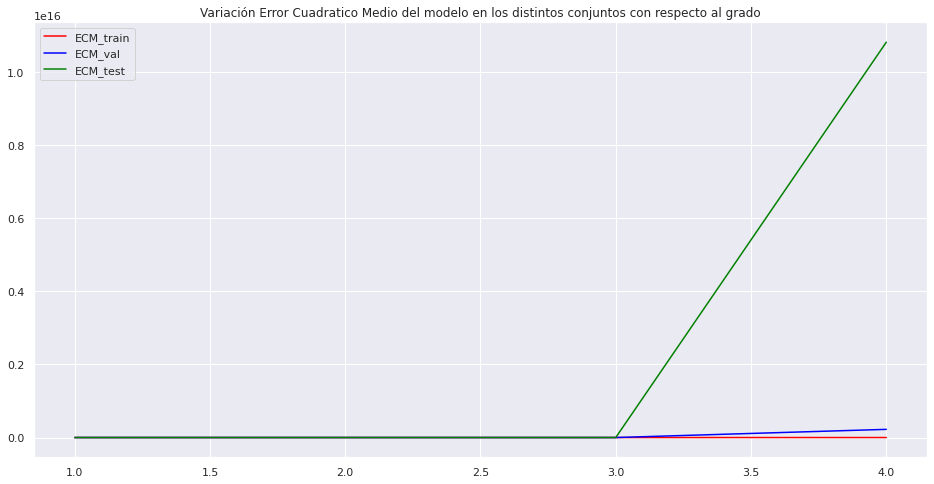

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(grado, ECM_train, label="ECM_train", color="red")
plt.plot(grado, ECM_val, label="ECM_val", color="blue")
plt.plot(grado, ECM_test, label="ECM_test", color="green")
plt.title("Variación Error Cuadratico Medio del modelo en los distintos conjuntos con respecto al grado")
plt.legend()
plt.show()

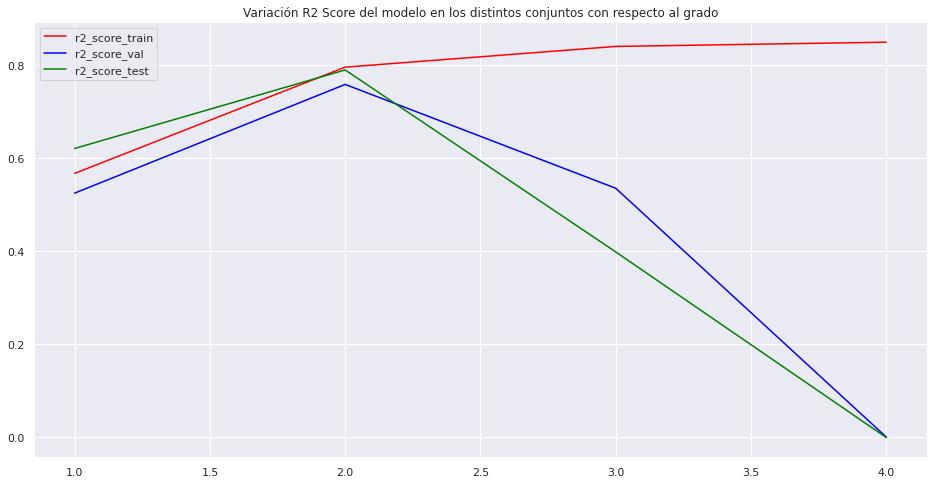

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(grado, r2_train, label="r2_score_train", color="red")
plt.plot(grado, r2_val, label="r2_score_val", color="blue")
plt.plot(grado, r2_test, label="r2_score_test", color="green")
plt.title("Variación R2 Score del modelo en los distintos conjuntos con respecto al grado")
plt.legend()
plt.show()

Al usar todas caracteristicas para hacer la expansion a regresion polinomial, solo se pudo hacer hasta el grado 4 debido que a partir del grado 5 de usaba mucha memoria RAM al hacer la transformacion de los datos para hacer una regresion polinomial y al entrenar el modelo con los datos.
Sin embargo, se logra ver que el ECM del modelo en los datos de entreanamiento y de validacion tiene valores cercanos a 0, y el error de test aumenta significativamente a partir del grado 3, donde en el grado 4 se ve que es muy alto. Además, el R2 Score en los datos de entrenamiento aumenta y toma valores cercanos a 1, mientras que el R2 Score en los datos de validacion y test disminuye a partir del grado 2, tomnado valores cercanoa a 0. Esto indica que se produce un overfiting conforme el grado de una regresion polinomial y el modelo no sea bueno prediciendo precios.


In [ ]:
#aplicacion de metodo de reduccion de dimensionalidad
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

modelo_pca = pca_pipe.named_steps['pca']
df_pca= pd.DataFrame(data    = modelo_pca.components_, columns = X.columns)
df_pca

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2.463517e-01,3.642570e-01,0.394826,1.044160e-01,2.367033e-01,4.608167e-02,1.128414e-01,-8.641629e-02,3.676149e-01,0.393106,0.083822,2.531052e-01,2.023075e-03,-1.614131e-01,-3.747305e-03,1.887937e-01,3.558551e-01,1.112419e-01
1,1.642598e-01,8.859428e-02,0.196032,-1.434499e-01,-1.358966e-01,2.103146e-01,3.447231e-01,2.030943e-01,9.045396e-02,-0.018909,0.442190,-3.292957e-01,1.820914e-01,3.349012e-01,2.357287e-01,-3.756103e-01,8.033394e-02,-1.498462e-01
2,-9.563874e-03,-1.099323e-01,0.038256,5.471320e-01,-3.360758e-01,1.102710e-01,1.592180e-01,2.412108e-01,-9.256274e-02,-0.052408,0.177448,-2.021728e-01,5.114175e-02,-1.619150e-01,-1.656875e-01,1.734514e-01,4.861828e-02,5.531340e-01
3,-3.373844e-01,-5.445639e-02,-0.093629,2.524141e-01,2.987564e-01,3.550792e-01,2.751616e-01,-3.865773e-01,7.309521e-02,0.058558,-0.303868,3.843696e-02,2.318576e-01,3.268703e-01,1.470570e-01,-1.581701e-01,-4.574560e-02,2.414770e-01
4,9.198243e-02,3.543132e-02,0.068151,2.767491e-01,6.316852e-02,-5.665469e-01,-3.969537e-01,-5.039821e-02,5.701293e-02,0.053473,0.041376,-1.099465e-01,-2.612995e-02,3.111958e-01,4.658579e-01,-1.473716e-01,-1.809581e-02,2.597427e-01
5,1.459889e-01,3.507450e-02,0.023406,-5.794785e-02,-1.251481e-02,-1.411029e-01,-1.731384e-01,-1.641491e-01,-7.746801e-02,0.045727,-0.036985,-1.893910e-01,8.879240e-01,-1.509388e-01,-1.596483e-01,9.704588e-02,-3.931259e-02,-5.992541e-02
6,2.367499e-01,1.791862e-01,0.024574,1.327701e-01,7.846041e-02,-1.294219e-01,-3.196996e-03,-2.723576e-01,-1.019554e-01,-0.102119,0.242070,2.024794e-01,-9.530985e-02,2.469418e-01,-6.407440e-01,-3.688543e-01,-2.248994e-01,9.405219e-02
7,1.135462e-01,5.636602e-03,0.009643,4.113548e-02,3.402335e-01,1.031243e-02,-6.545154e-02,6.425206e-01,2.729496e-02,0.251647,-0.450840,-2.130706e-01,1.551261e-02,1.193152e-01,-2.738660e-01,-2.174247e-01,-4.745772e-02,2.401440e-02
8,4.690224e-01,1.755285e-01,-0.065729,8.834094e-02,1.718328e-01,5.393240e-01,-3.179299e-01,5.017049e-02,-2.471852e-01,-0.103857,0.057924,1.086121e-01,-9.442695e-03,-4.614236e-02,2.946012e-01,1.101001e-01,-3.468072e-01,6.816144e-02
9,4.514758e-01,-3.024443e-01,0.075204,-4.137522e-02,-3.043016e-01,1.363698e-01,-5.381174e-02,-3.985022e-01,-8.245121e-02,0.258986,-0.328517,-3.433351e-01,-2.257141e-01,1.334174e-01,-7.917652e-02,4.386888e-03,2.204902e-01,-3.329402e-02


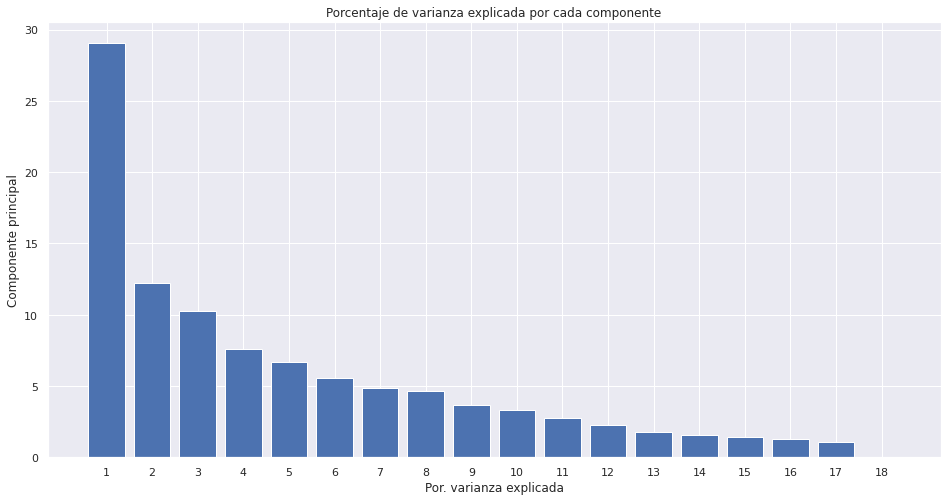

In [ ]:
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)

plt.figure(figsize=(16, 8))
plt.bar(x= range(1,19), height=percent_variance)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

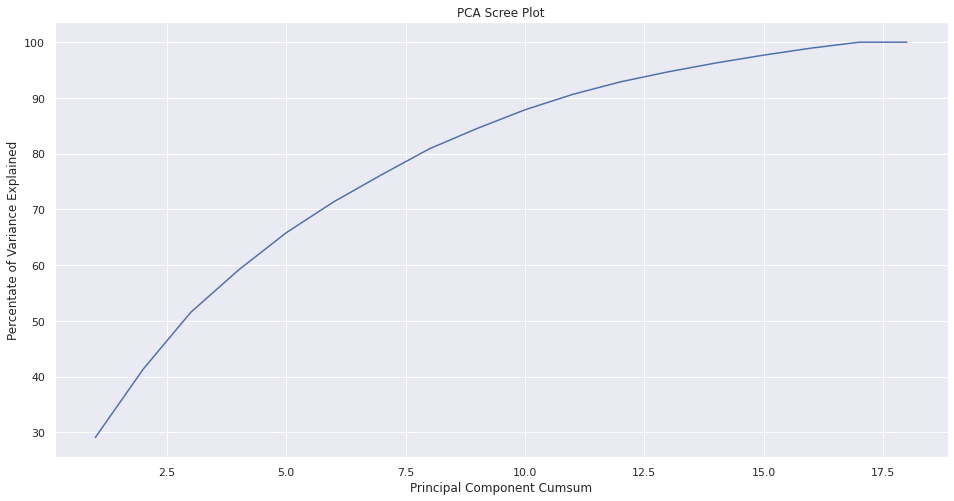

In [ ]:
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(16, 8))
plt.plot(range(1,19), percent_variance_cum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Se logra ver que con 8 componentes en el PCA se explica aproximadamente mas del 80 % de la varianza, por lo tanto se usaran 8 componenetes.

In [ ]:
sc=StandardScaler()                                                 
norm_X = sc.fit_transform(X)

pca = PCA(n_components=8)                                          
new_X = pca.fit_transform(norm_X)

In [ ]:
grado = [1, 2, 3, 4, 5, 6, 7] 

ECM_train= []
ECM_val= []
ECM_test= []
r2_train= []
r2_val= []
r2_test= []

for i in grado:

    poly_tem= PolynomialFeatures(degree=i, include_bias=False)
    poly_features= poly_tem.fit_transform(new_X)

    X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.2, random_state=30)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=39)

    model_temp= LinearRegression()
    model_temp.fit(X_train, Y_train)
    print(X_train.shape)

    ECM_train.append(mean_squared_error(model_temp.predict(X_train), Y_train))
    r2_train.append(r2_score(model_temp.predict(X_train), Y_train))

    ECM_val.append(mean_squared_error(model_temp.predict(X_val), Y_val))
    r2_val.append(r2_score(model_temp.predict(X_val), Y_val))

    ECM_test.append(mean_squared_error(model_temp.predict(X_test), Y_test))
    r2_test.append(r2_score(model_temp.predict(X_test), Y_test))

(13832, 8)
(13832, 44)
(13832, 164)
(13832, 494)
(13832, 1286)
(13832, 3002)
(13832, 6434)


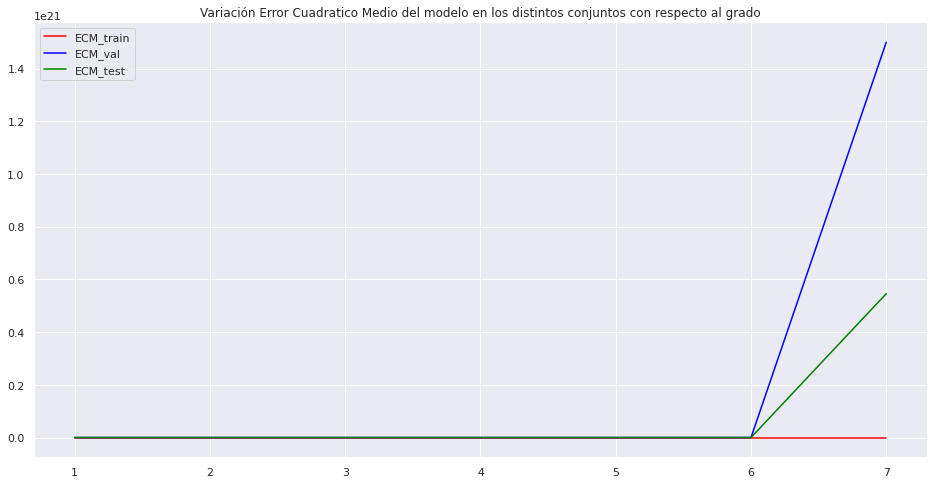

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(grado, ECM_train, label="ECM_train", color="red")
plt.plot(grado, ECM_val, label="ECM_val", color="blue")
plt.plot(grado, ECM_test, label="ECM_test", color="green")
plt.title("Variación Error Cuadratico Medio del modelo en los distintos conjuntos con respecto al grado")
plt.legend()
plt.show()

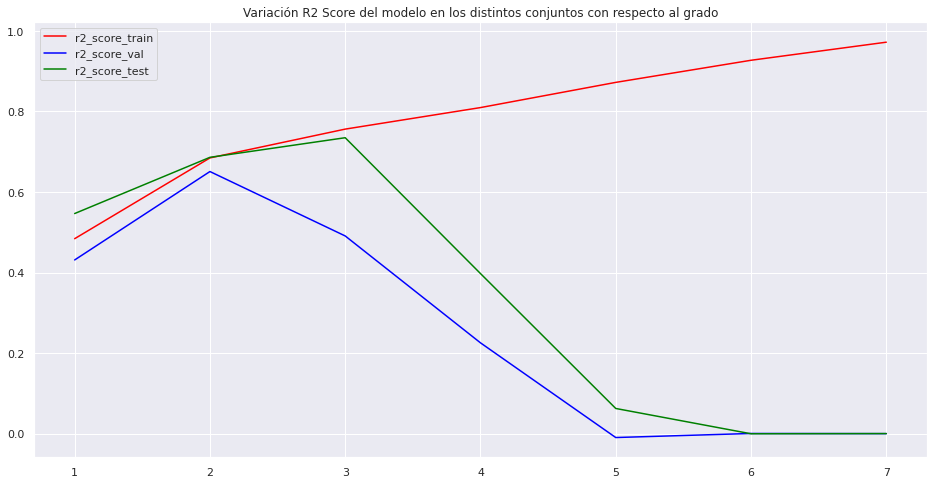

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(grado, r2_train, label="r2_score_train", color="red")
plt.plot(grado, r2_val, label="r2_score_val", color="blue")
plt.plot(grado, r2_test, label="r2_score_test", color="green")
plt.title("Variación R2 Score del modelo en los distintos conjuntos con respecto al grado")
plt.legend()
plt.show()

Gracias a estos graficos se logra ver que se obtienen los mismos resultados a pesar de aplicar un metodo reducción de dimensionalidad, es decir, el error de entrenamineto disminuyo si aumnetados el grado de una regresion polinomial, aumentado el error de validacion y de test, lo cual indica un overfiting de este modelo. 

# Dataset 3: Diamond Prices

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

In [ ]:
data = pd.read_csv('pregunta 1/Diamonds Prices2022.csv')

### Descripción del dataset

Este documento explora un conjunto de datos que contiene precios y atributos de aproximadamente 54 000 diamantes de talla redonda.
Hay 53.940 diamantes en el conjunto de datos con 10 características (quilate, corte, color, claridad, profundidad, tabla, precio, x, y y z). La mayoría de las variables son de naturaleza numérica, pero las variables corte, color y claridad son variables factoriales ordenadas con los siguientes niveles.
Acerca de la moneda para la columna de precio: es Precio ($)
Y sobre las columnas x, y y z son medidas de diamantes como (x: largo en mm, y: ancho en mm,z: profundidad en mm)

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Unnamed 0. no entrega info relevante para el análisis por lo que se eliminará
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
data['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
data['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
#doesn't exists columns with null data
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Análisis exploratorio de datos

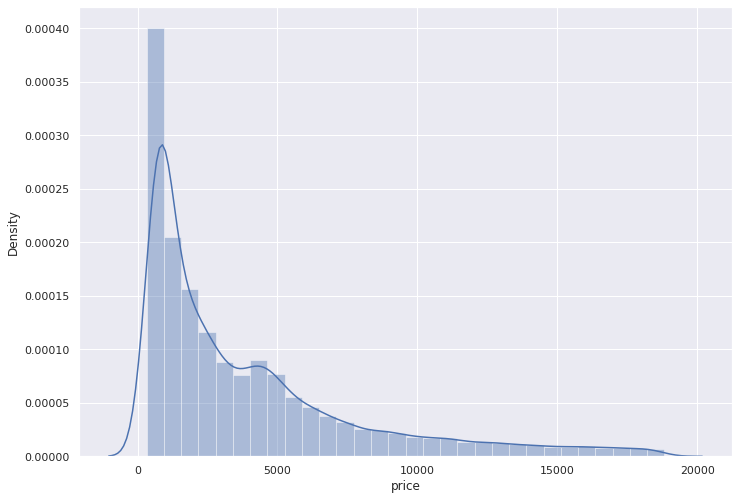

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['price'], bins=30)
plt.show()
#Los precios siguen una distribución asimétrica hacia la izquierda
#lo q indica que los precios tienden a acumularse en valores entre 0 y 5000 

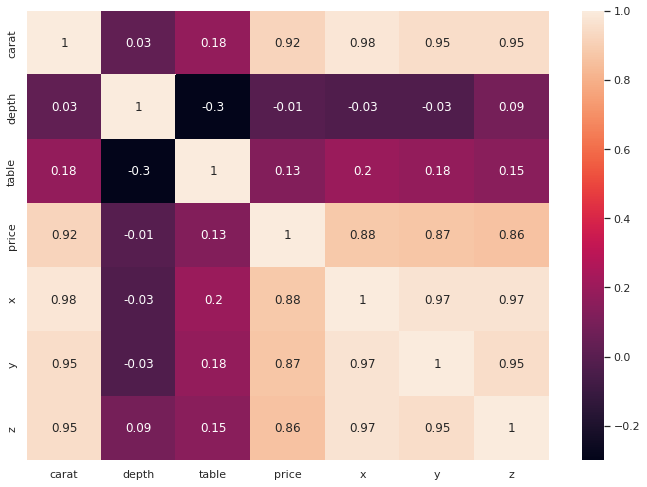

In [ ]:
#La matriz de correlación permite determinar 
#si existe una relación lineal entre variables
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#Se observa que 'price' tiende a relacionarse de manera lineal
#con las features carat, x , y , z (presentan valores cercanos a 1)

Note que para la variable price, se establece una fuerte relación lineal
con las características carat, x, y, z. 

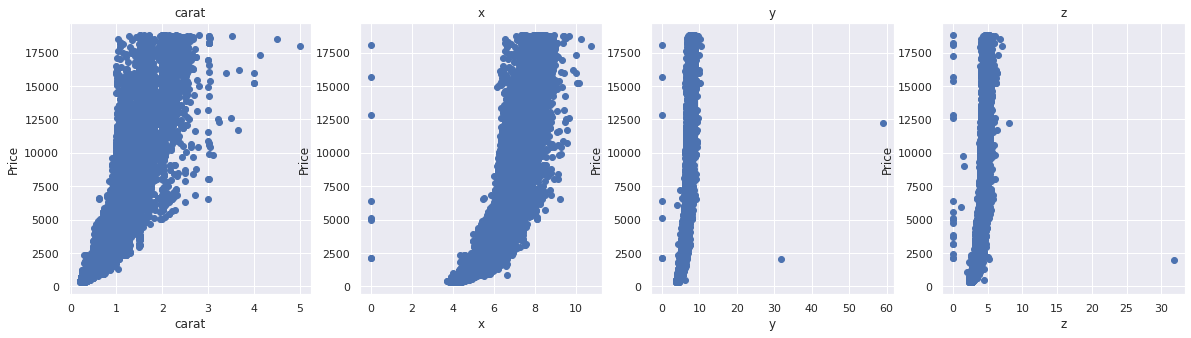

In [ ]:
plt.figure(figsize=(20, 5))

features = ['carat','x','y','z']
target = data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

Note que la feature carat también presenta una relación fuertemente lineal con las features x, y, z, lo cual puede generar un problema de multilinealidad

### ¿Y que pasa con las variables categóricas cut, color y clarity?
Deben ser transformadas a datos numéricos

---



>* Label Encoding: Transforming the word labels into numerical form
>* One hot encoding: Representation of categorical variable as binary vectors
>* Dummy variable trap:  Independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.


In [ ]:
# Dummy variable
categorical_columns = ['cut','color', 'clarity']
data_encode = pd.get_dummies(data = data, prefix = 'CAT', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
               dtype='int8')

In [ ]:
print('Columns in original data frame:\n',data.columns.values)
print('\nNumber of rows and columns in the dataset:',data.shape)
print('\nColumns in data frame after encoding dummy variable:\n',data_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',data_encode.shape)

Columns in original data frame:
 ['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']

Number of rows and columns in the dataset: (53943, 10)

Columns in data frame after encoding dummy variable:
 ['carat' 'depth' 'table' 'price' 'x' 'y' 'z' 'CAT_Good' 'CAT_Ideal'
 'CAT_Premium' 'CAT_Very Good' 'CAT_E' 'CAT_F' 'CAT_G' 'CAT_H' 'CAT_I'
 'CAT_J' 'CAT_IF' 'CAT_SI1' 'CAT_SI2' 'CAT_VS1' 'CAT_VS2' 'CAT_VVS1'
 'CAT_VVS2']

Number of rows and columns in the dataset: (53943, 24)


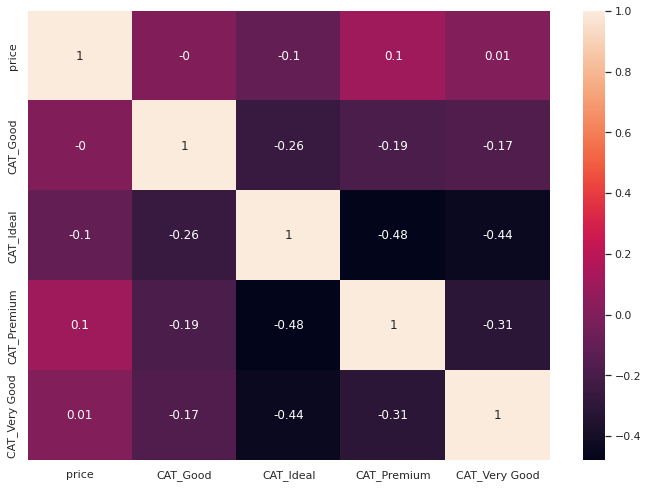

In [ ]:
#Matriz de correlacion con las columnas asociadas a la caract categórica 'cut'
subdata_encode = data_encode[['price','CAT_Good','CAT_Ideal','CAT_Premium','CAT_Very Good']]
correlation_matrix_encode = subdata_encode.corr().round(2)
sns.heatmap(data=correlation_matrix_encode, annot=True)

Las features asociadas a 'cut' presentan una relación no lineal respecto al precio

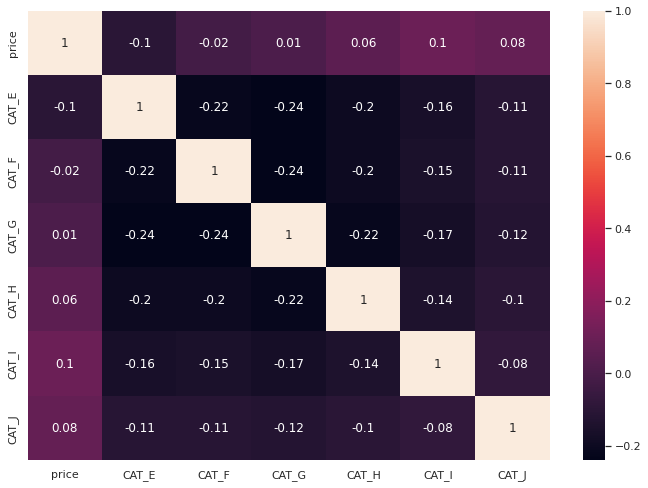

In [ ]:
#Matriz de correlacion con las columnas asociadas a la caract categórica 'color'
subdata_encode = data_encode[['price','CAT_E','CAT_F','CAT_G','CAT_H','CAT_I','CAT_J']]
correlation_matrix_encode = subdata_encode.corr().round(2)
sns.heatmap(data=correlation_matrix_encode, annot=True)

Las features asociadas a 'color' presentan una relación no lineal respecto al precio

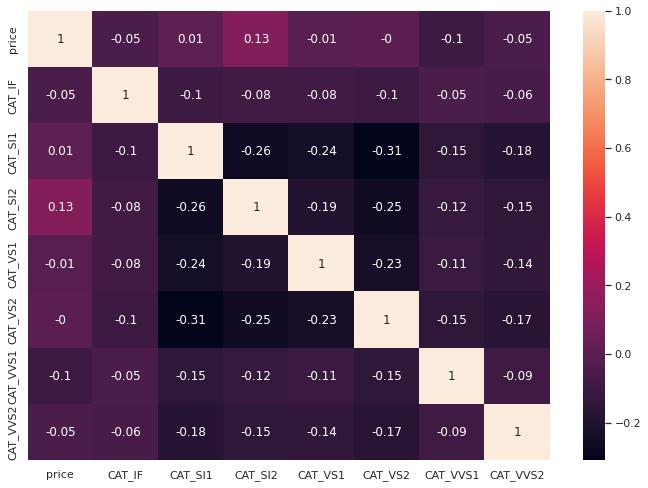

In [ ]:
#Matriz de correlacion con las columnas asociadas a la caract categórica 'clarity'
subdata_encode = data_encode[['price','CAT_IF','CAT_SI1','CAT_SI2','CAT_VS1','CAT_VS2','CAT_VVS1','CAT_VVS2']]
correlation_matrix_encode = subdata_encode.corr().round(2)
sns.heatmap(data=correlation_matrix_encode, annot=True)

Las features asociadas a 'clarity' presentan una relación no lineal respecto al precio

> En base al análisis anterior solo se considerarán para el entrenamiento del modelo las features carat, x , y , z asociadas linealmente con la variable objetivo price

## Preparing the data

In [ ]:
X = pd.DataFrame(np.c_[data['carat'],data['x'],data['y'],data['z']], columns = ['carat','x','y','z'])
Y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#training 80%, testing 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

##Escalamiento normalizacion N(0,1) ¿Es válido aplicar esto sin saber si las features se distribuyen de manera normal?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

(43154, 4)
(10789, 4)
(43154,)
(10789,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1525.874236810672
R2 score is 0.8532037446494116


The model performance for testing set
--------------------------------------
RMSE is 1516.34741160529
R2 score is 0.8574495871553659


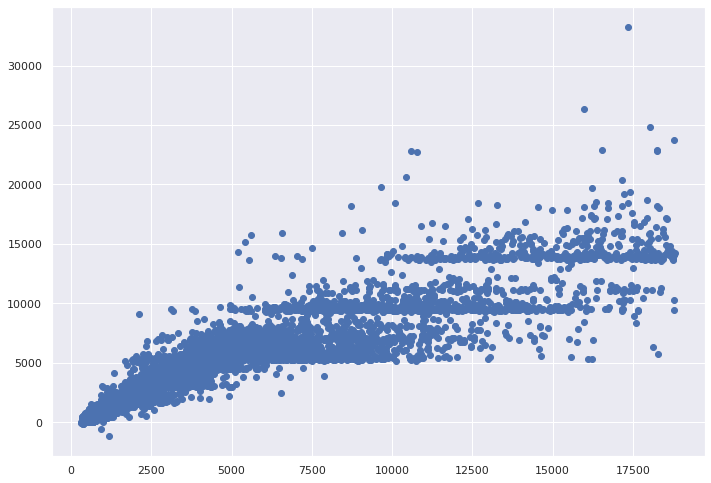

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

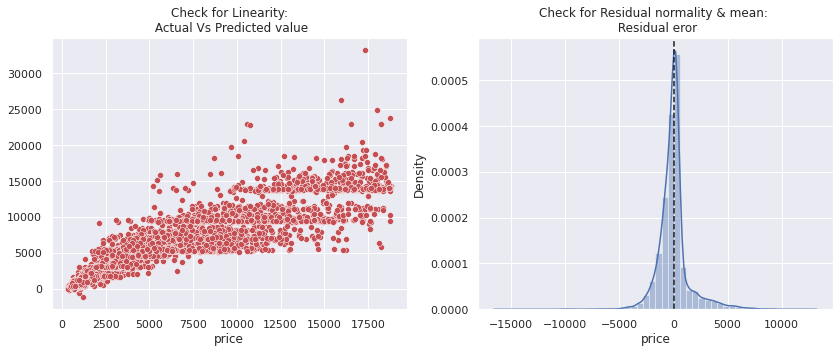

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(Y_test,y_test_predict,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((Y_test - y_test_predict),ax=ax,color='b')
ax.axvline((Y_test - y_test_predict).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

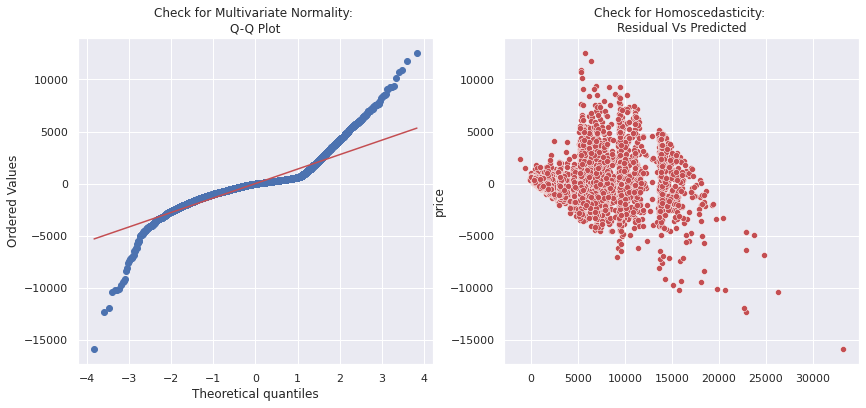

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((Y_test - y_test_predict),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (Y_test - y_test_predict), x= y_test_predict, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

##  Expandiendo el modelo lineal a uno polinomial:  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression_model(degree, X, Y):
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  # transforms the existing features to higher degree features.
  poly_X = poly_features.fit_transform(X)
  
  #training 80%, testing 20%
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
  X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=0)
  ##Escalamiento normalizacion N(0,1) 
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train) 
  X_test = scaler.transform(X_test)
  X_val = scaler.transform(X_val)

  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)


  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  # # predicting on val data-set
  y_val_predicted = poly_model.predict(poly_features.fit_transform(X_val))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  # evaluating the model on val dataset
  rmse_val = np.sqrt(mean_squared_error(Y_val, y_val_predicted))
  r2_val = r2_score(Y_val, y_val_predicted)
 
  return [(r2_train, rmse_train), (r2_test, rmse_test), (r2_val, rmse_val)]

In [ ]:
#Se elijen las mismas características ya definidas
X = pd.DataFrame(np.c_[data['carat'],data['x'],data['y'],data['z']], columns = ['carat','x','y','z'])
Y = data['price']

In [ ]:
alphas = list(np.arange(1, 4 + 1, 1, dtype=int))
print(alphas)

scores_r2 = []
scores_rmse = []

X = pd.DataFrame(np.c_[data['carat'],data['x'],data['y'],data['z']], columns = ['carat','x','y','z'])
Y = data['price']

for i in alphas:
  train, test, val = polynomial_regression_model(i, X, Y)
  scores_r2.append((train[0], test[0], val[0]))
  scores_rmse.append((train[1], test[1], val[1]))

[1, 2, 3, 4]


In [ ]:
scores_rmse

[(1509.5656603743141, 1517.2876749376792, 1590.0103989150437),
 (1402.879240772143, 1457.7082433680775, 1464.625690973858),
 (1369.0343338266593, 1558.3994331751303, 1437.1464758577818),
 (1356.2854335969266, 2535.951054031307, 3525.144684968536)]

In [ ]:
scores_r2

[(0.8551292639786031, 0.8572727457776314, 0.8456970598893894),
 (0.8748827390706941, 0.8682616346252493, 0.8690734971982079),
 (0.8808469042159337, 0.8494334102307131, 0.8739402793481207),
 (0.8830557573433564, 0.60129398740976, 0.24154788737526733)]

In [ ]:
def plot_scores(scores, score_type):
    scores_df = pd.DataFrame(alphas)
        
    if score_type == 'r2':
        scores_df['r2_train'] = [s[0] for s in scores]
        scores_df['r2_val'] = [s[1] for s in scores]
        scores_df['r2_test'] = [s[2] for s in scores]
        
    if score_type == 'rmse':
        scores_df['rmse_train'] = [s[0] for s in scores]
        scores_df['rmse_val'] = [s[1] for s in scores]
        scores_df['rmse_test'] = [s[2] for s in scores]   


    scores_df.rename(columns = {0:'alpha'}, inplace = True)
    scores_df = scores_df.set_index('alpha')

    display(scores_df)

    # plot using lineplot
    sns.set(style='darkgrid')
    sns.set(rc={'figure.figsize':(15,5)})
    plt.ylabel(f"{score_type} scores")
    plt.title(f'{score_type.capitalize()} score variation of polynomial features')
    sns.lineplot(data=scores_df)
    plt.show()

,r2_train,r2_val,r2_test
alpha,,,
1,0.855129,0.857273,0.845697
2,0.874883,0.868262,0.869073
3,0.880847,0.849433,0.873940
4,0.883056,0.601294,0.241548


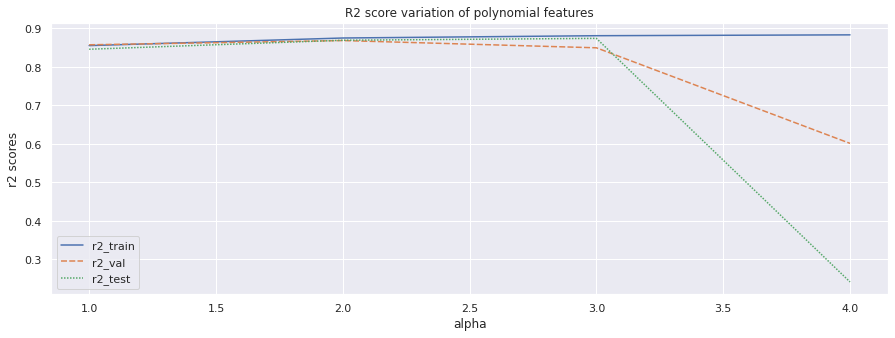

In [ ]:
plot_scores(scores_r2, 'r2')

,rmse_train,rmse_val,rmse_test
alpha,,,
1,1509.565660,1517.287675,1590.010399
2,1402.879241,1457.708243,1464.625691
3,1369.034334,1558.399433,1437.146476
4,1356.285434,2535.951054,3525.144685


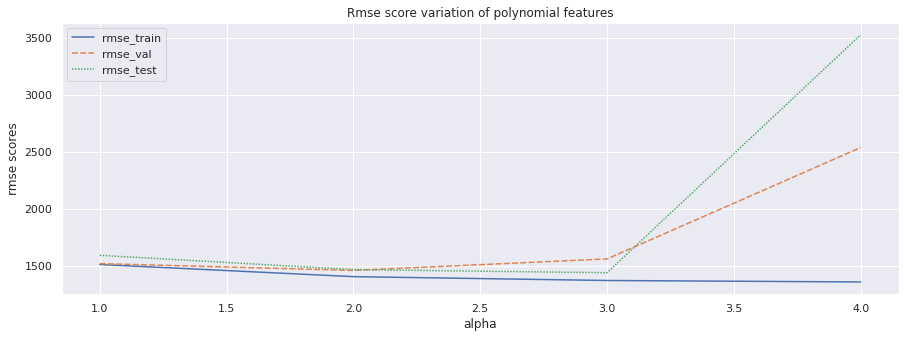

In [ ]:
plot_scores(scores_rmse, 'rmse')

## ¿Qué es posible indicar respecto a la hipótesis?

>Se utilizaron dos criterios para medir el desempeño de los modelos, a saber, RMSE (error cuadrático medio) y r2 (r-cuadrado o coeficiente de determinación). El primero indica si el modelo lineal se ajusta a los datos, y se puede intepretar como la desviación estandar de la varianza inexplicada. Así valores bajos de rmse indican un mejor ajuste. R-cuadrado indica que tan cerca están los datos de la línea de regresión ajustada, y se define como el porcentaje de la variación que es explicado por un modelo lineal. En general, cuanto mayor es el r-cuadrado, mejor se ajusta el modelo a los datos.

> Se observa en el primer gráfico que el valor de r2_train se va acercando a 1 a medida que el grado del polinomio aumenta. Mientras que el error de predicción r2_test presenta una disminución en sus valores para el polinomio de grado 3 en adelante. Esto tiene sentido ya que a medida que el grado del polinomio aumenta, también aumenta la complejidad del modelo y con esto la probabilidad de que ocurra overfitting. En otras palabras, a mayor grado del polinomio, peor es la capacidad del modelo de predecir de manera correcta (mayor error de predicción), pero al mismo tiempo es mejor su capacidad de "aprender de memoria" la distribución de datos de entrenamiento, lo que tiene como consecuencia un menor error de entrenamiento.

> Se observa en el segundo gráfico que el valor de rmse_train va disminuyendo su valor, lo que indica que el error de entrenamiento es menor a medida que el grado del polinomio va en aumento. rmse_test aumenta para polinomios de grado 3 en adelante.

> Se concluye que la hipótesis es correcta para este dataset

# Parte 2. **Desafío Kaggle** 

En esta competencia, se le pide crear un modelo que sugiera automáticamente los precios correctos de los productos. Se le proporcionarán descripciones de texto y detalles como la categoría del producto, el nombre de la marca y la condición del artículo.


https://www.kaggle.com/competitions/price-predictionml

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.sparse import csr_matrix
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import string
import json
import warnings
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() # lematizador
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_train = pd.read_csv('pregunta2/train.csv')
df_test = pd.read_csv('pregunta2/test.csv')
categories = pd.read_json('pregunta2/categories.json', typ='series')
categories = pd.DataFrame(categories).reset_index()
categories.columns = ['category_id', 'category_name']
df_train = df_train.set_index('train_id')
df_test = df_test.set_index('train_id')

In [ ]:
categories.sort_values(by='category_id').head()

,category_id,category_name
133,0,Beauty/Bath & Body/Bath
581,1,Beauty/Bath & Body/Bathing Accessories
285,2,Beauty/Bath & Body/Cleansers
561,3,Beauty/Bath & Body/Other
359,4,Beauty/Bath & Body/Scrubs & Body Treatments


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107156 entries, 196020 to 343457
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1107156 non-null  object 
 1   item_condition_id  1107156 non-null  object 
 2   category_name      1107156 non-null  int64  
 3   brand_name         635451 non-null   object 
 4   price              1107156 non-null  float64
 5   shipping           1107156 non-null  int64  
 6   item_description   1107152 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.6+ MB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107156 entries, 196020 to 343457
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1107156 non-null  object 
 1   item_condition_id  1107156 non-null  object 
 2   category_name      1107156 non-null  int64  
 3   brand_name         635451 non-null   object 
 4   price              1107156 non-null  float64
 5   shipping           1107156 non-null  int64  
 6   item_description   1107152 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.6+ MB


In [ ]:
df_train['item_condition_id'].value_counts()

New (codes: BNWT, BNIP MIB, NWT, NIB, BNIB)    478366
Good                                           322963
Like New (codes: BNWOT, MWOB, NWOT, BNWOB)     280120
Fair                                            23911
Poor                                             1796
Name: item_condition_id, dtype: int64

In [ ]:
# cambiaremos los valores categóricos de la condition por unos mas cortos para mejor visualización
df_train['item_condition_id'] = df_train['item_condition_id'].map({'New (codes: BNWT, BNIP MIB, NWT, NIB, BNIB)': 'New',
                                                                   'Like New (codes: BNWOT, MWOB, NWOT, BNWOB)': 'Like New',
                                                                   'Good': 'Good',
                                                                   'Fair': 'Fair',
                                                                   'Poor': 'Poor'})

# cambiaremos los valores categóricos de la condition por unos mas cortos para mejor visualización
df_test['item_condition_id'] = df_test['item_condition_id'].map({'New (codes: BNWT, BNIP MIB, NWT, NIB, BNIB)': 'New',
                                                                   'Like New (codes: BNWOT, MWOB, NWOT, BNWOB)': 'Like New',
                                                                   'Good': 'Good',
                                                                   'Fair': 'Fair',
                                                                   'Poor': 'Poor'})

In [ ]:
df_train['item_condition_id'].value_counts()

New         478366
Good        322963
Like New    280120
Fair         23911
Poor          1796
Name: item_condition_id, dtype: int64

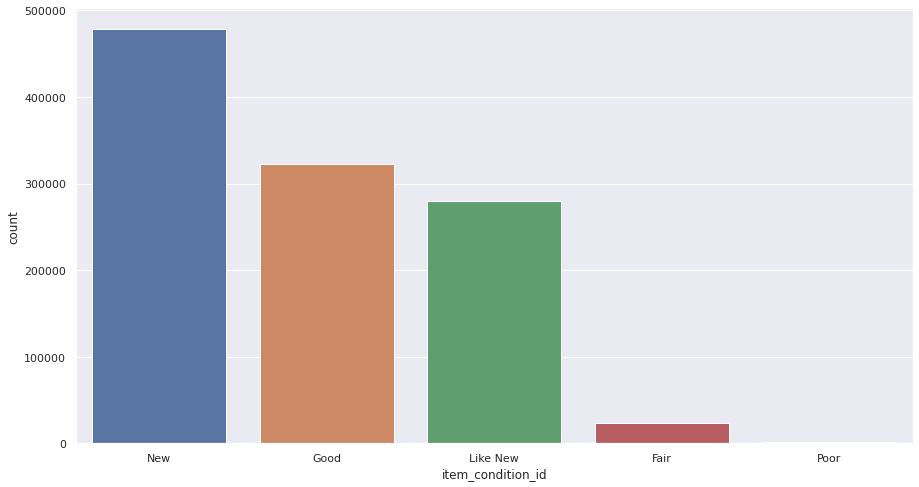

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'item_condition_id',
              data = df_train,
              order = df_train['item_condition_id'].value_counts().index)
plt.show()

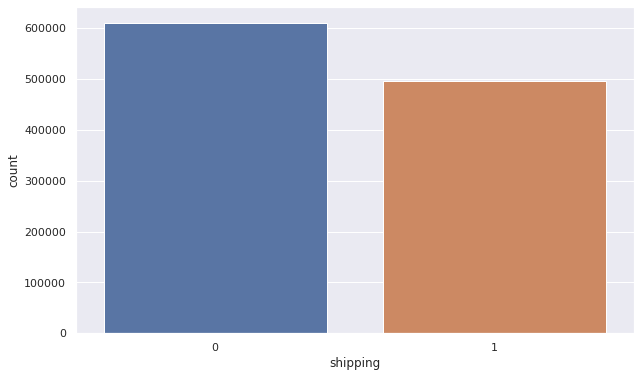

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_train['shipping'])

In [ ]:
categorical_columns = ["category_name", 
                       "brand_name",
                       "item_condition_id", 
                       "item_description"]

In [ ]:
df_train['price'].sort_values(ascending=False)

train_id
760469     1932658.0
1262245    1929772.0
1393600    1927848.0
742113     1924000.0
415027     1924000.0
             ...    
491632           0.0
1409432          0.0
156674           0.0
408952           0.0
643475           0.0
Name: price, Length: 1107156, dtype: float64

In [ ]:
# veamos cuantos valores nulos tienen las columnas
print(df_train.isnull().sum(axis = 0))

name                      0
item_condition_id         0
category_name             0
brand_name           471705
price                     0
shipping                  0
item_description          4
dtype: int64


In [ ]:
df_train[df_train['brand_name'].isnull()]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
441251,Purple Bikini Top,Like New,1253,NaN,11544.0,0,"Double strap bikini top, no brand. Size small,..."
1035108,Hair product,New,13,NaN,61568.0,0,Wen by Chaz Dean Comes with 3 Cleansing Condit...
118783,Baby girl lot,Good,626,NaN,9620.0,0,"All clothes with 6,6-9 months white bottoms 3-..."
90744,NEW SEXY BANDAGE BIKINI,New,1252,NaN,17316.0,1,◾️BRAND NEW--limited availability--2 available...
342067,Sale❣2 Matte For Jasmine Only!,New,28,NaN,9620.0,1,For Jasmine ONLY! Madly Matte Lipgloss by Klea...
...,...,...,...,...,...,...,...
1290399,BUNDLE FOR KAYLA,Good,1260,NaN,29822.0,0,No description yet
1207482,Bundle For KB Short,Like New,1193,NaN,29822.0,0,•MK Ivory 2 •Maurices Jegging size 17 •RXB XL ...
454688,Black twilly scarf one pair,New,1274,NaN,15392.0,0,New pair twilly scarves of your bag accessorie...


In [ ]:
# porcentaje de valores nulos de los nombres de la marca del producto
null_brand_names = df_train['brand_name'].isnull().sum()/(df_train['brand_name'].notnull().sum() + df_train['brand_name'].isnull().sum())
print(f"Hay un {np.round(null_brand_names*100, 2)}% de valores nulos en brand_name")

Hay un 42.61% de valores nulos en brand_name


In [ ]:
df_train['brand_name'].describe()

count     635451
unique      4429
top         Nike
freq       40468
Name: brand_name, dtype: object

In [ ]:
# rellenaremos los valores nulos con marca desconocida
df_train['brand_name'].fillna('unknown', inplace=True)
df_test['brand_name'].fillna('unknown', inplace=True)

# dropeamos las filas restantes que tienen nan
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
# veamos cuantos valores nulos tienen las columnas
print(df_train.isnull().sum(axis = 0))

name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64


In [ ]:
gr = df_train.groupby(['brand_name']).size().reset_index(name='counts') 
gr = gr.sort_values(by='counts', ascending=False)
gr

,brand_name,counts
4428,unknown,471702
2824,Nike,40468
2977,PINK,40392
4157,Victoria's Secret,36180
2410,LuLaRoe,23124
...,...,...
1724,Happy Chic Baby by Jonathan Adler,1
3441,SAS Safety Corp.,1
1725,Happy Socks,1
3439,Ruth,1


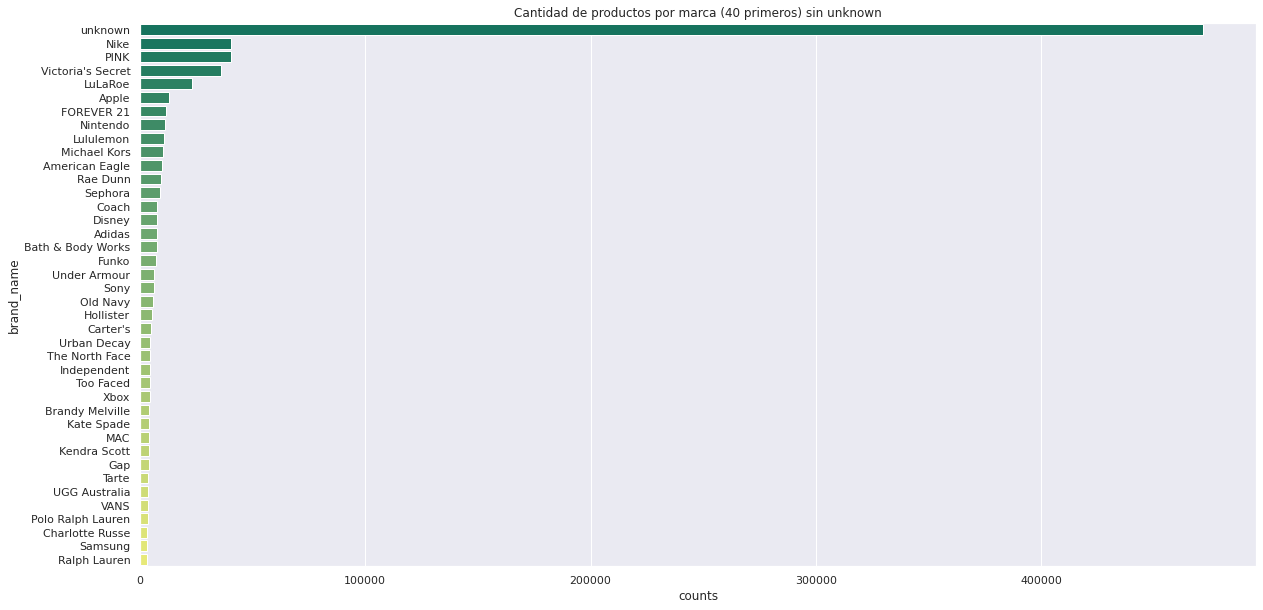

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
sns.barplot(data=gr.head(40), y='brand_name', x='counts', palette="summer",ax=ax)
ax.set_title('Cantidad de productos por marca (40 primeros) sin unknown')
plt.show()

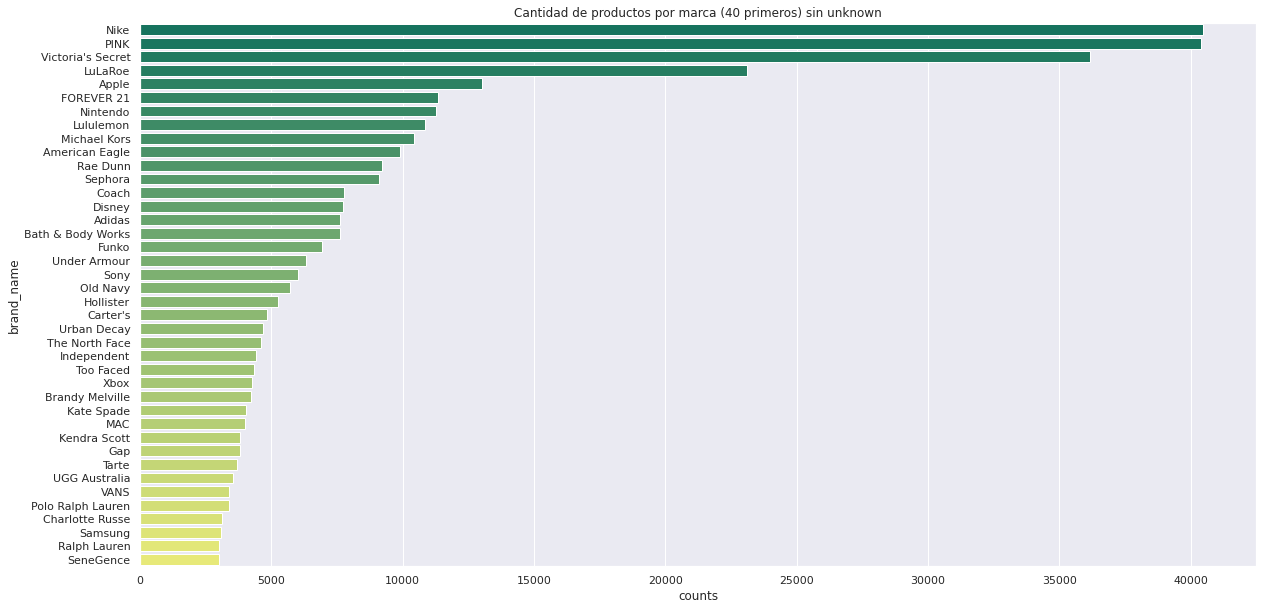

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
sns.barplot(data=gr[1: ].head(40), y='brand_name', x='counts', palette="summer",ax=ax)
ax.set_title('Cantidad de productos por marca (40 primeros) sin unknown')
plt.show()

In [ ]:
df_train['price']

train_id
196020     17316.0
441251     11544.0
1035108    61568.0
1168977    11544.0
118783      9620.0
            ...   
334426     32708.0
1050522    15392.0
758098      8658.0
1245337     4810.0
343457      2886.0
Name: price, Length: 1107152, dtype: float64

In [ ]:
df_train['price'].describe()

count    1.107152e+06
mean     2.572718e+04
std      3.735269e+04
min      0.000000e+00
25%      9.620000e+03
50%      1.635400e+04
75%      2.789800e+04
max      1.932658e+06
Name: price, dtype: float64

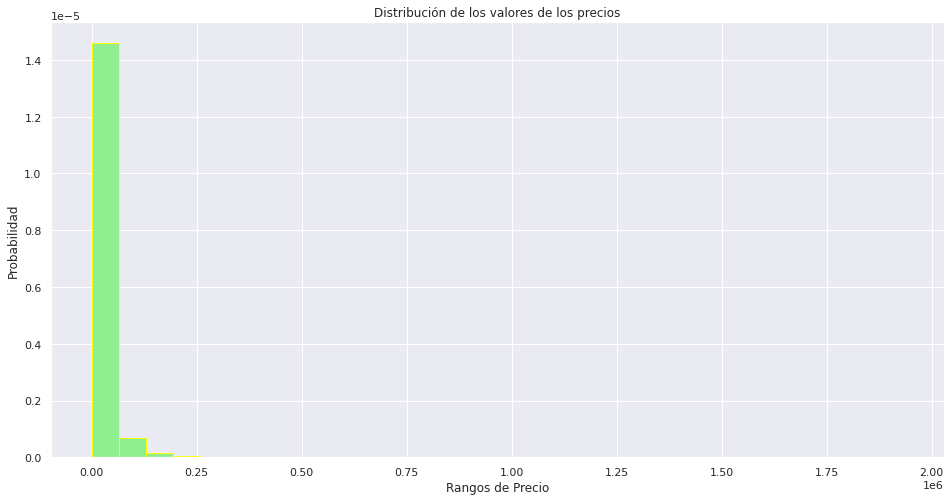

In [ ]:
plt.figure(figsize=(16,8))
plt.hist(df_train['price'], bins=30, fc="lightgreen", ec="yellow", density=True) 
plt.gca().set(title='Distribución de los valores de los precios',
              ylabel='Probabilidad', 
              xlabel='Rangos de Precio')
plt.show()

Text(0.5, 1.0, 'Distribución de los precios')

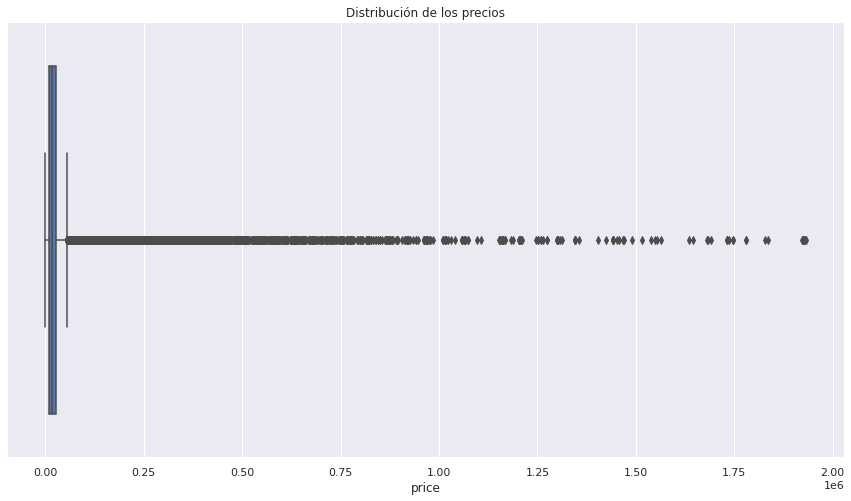

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_train["price"])
plt.title('Distribución de los precios')

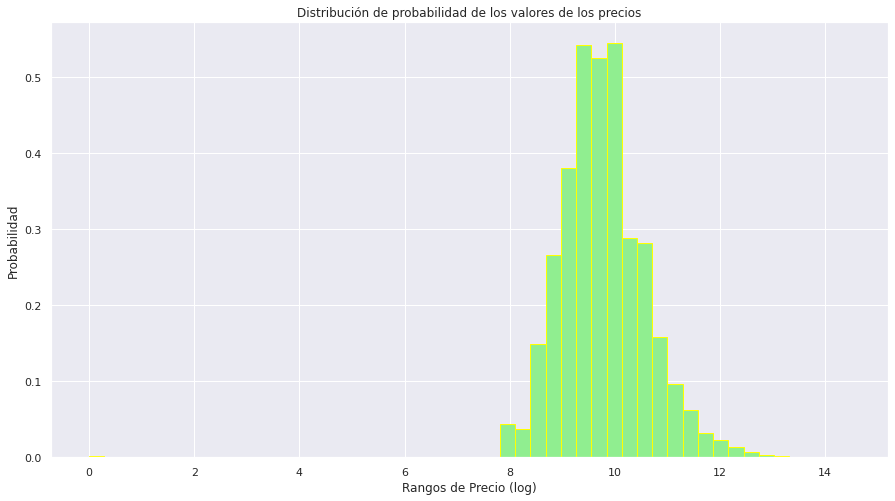

In [ ]:
plt.figure(figsize=(15,8))
n, bins, rectangles = plt.hist(np.log1p(df_train['price']), bins=50, fc="lightgreen", ec="yellow", density=True) 
plt.gca().set(title='Distribución de probabilidad de los valores de los precios',
              ylabel='Probabilidad', 
              xlabel='Rangos de Precio (log)')
plt.show()

Text(0.5, 1.0, 'Distribución de los precios (log)')

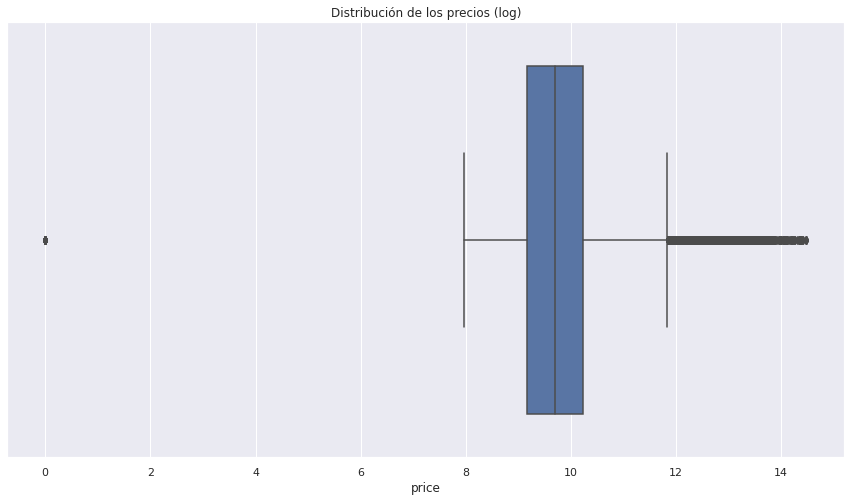

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=np.log1p(df_train['price']))
plt.title('Distribución de los precios (log)')

In [ ]:
gr_price_brands = df_train.groupby(['brand_name']).mean()[['price']].sort_values(by='price', ascending=False)
gr_price_brands = gr_price_brands.reset_index()

# vemos las que sean más caras que el percentil 90 de estas, estas se consideran como marcas caras
gr_price_brands = gr_price_brands[gr_price_brands['price'] > np.percentile(gr_price_brands['price'], 90)]
gr_price_brands

,brand_name,price
0,Demdaco,412698.000000
1,Oris,288600.000000
2,MCM Worldwide,277383.080000
3,EVGA,275132.000000
4,Saint Laurent,253880.545455
...,...,...
438,Zobo,49543.000000
439,Sun Mountain,49543.000000
440,Blackmilk,49382.666667
441,Wacom,49318.533333


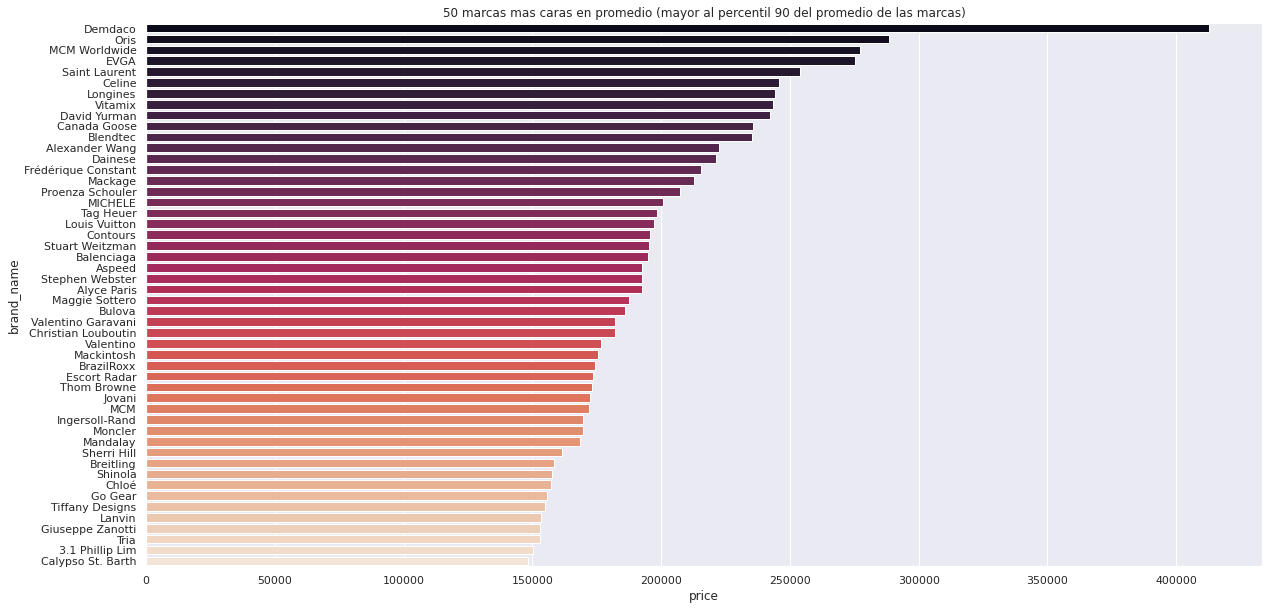

In [ ]:
fig, ax = plt.subplots(figsize=(20,10),nrows=1)
sns.barplot(data=gr_price_brands.head(50), y='brand_name', x='price', palette="rocket",ax=ax, orient='h')
ax.set_title('50 marcas mas caras en promedio (mayor al percentil 90 del promedio de las marcas)')
plt.show()

In [ ]:
df_train['name'].describe()

count     1107152
unique     932709
top        Bundle
freq         1661
Name: name, dtype: object

In [ ]:
df_name_counts = df_train.groupby(['name']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_name_counts

,name,counts
177150,Bundle,1661
693807,Reserved,337
224321,Converse,332
256218,Dress,301
218967,Coach purse,301
...,...,...
320114,Garanimals,1
320115,Garanimals 2piece set,1
320116,Garanimals Clothes Bundle - 2T/3T,1
320117,Garanimals Girls Boots,1


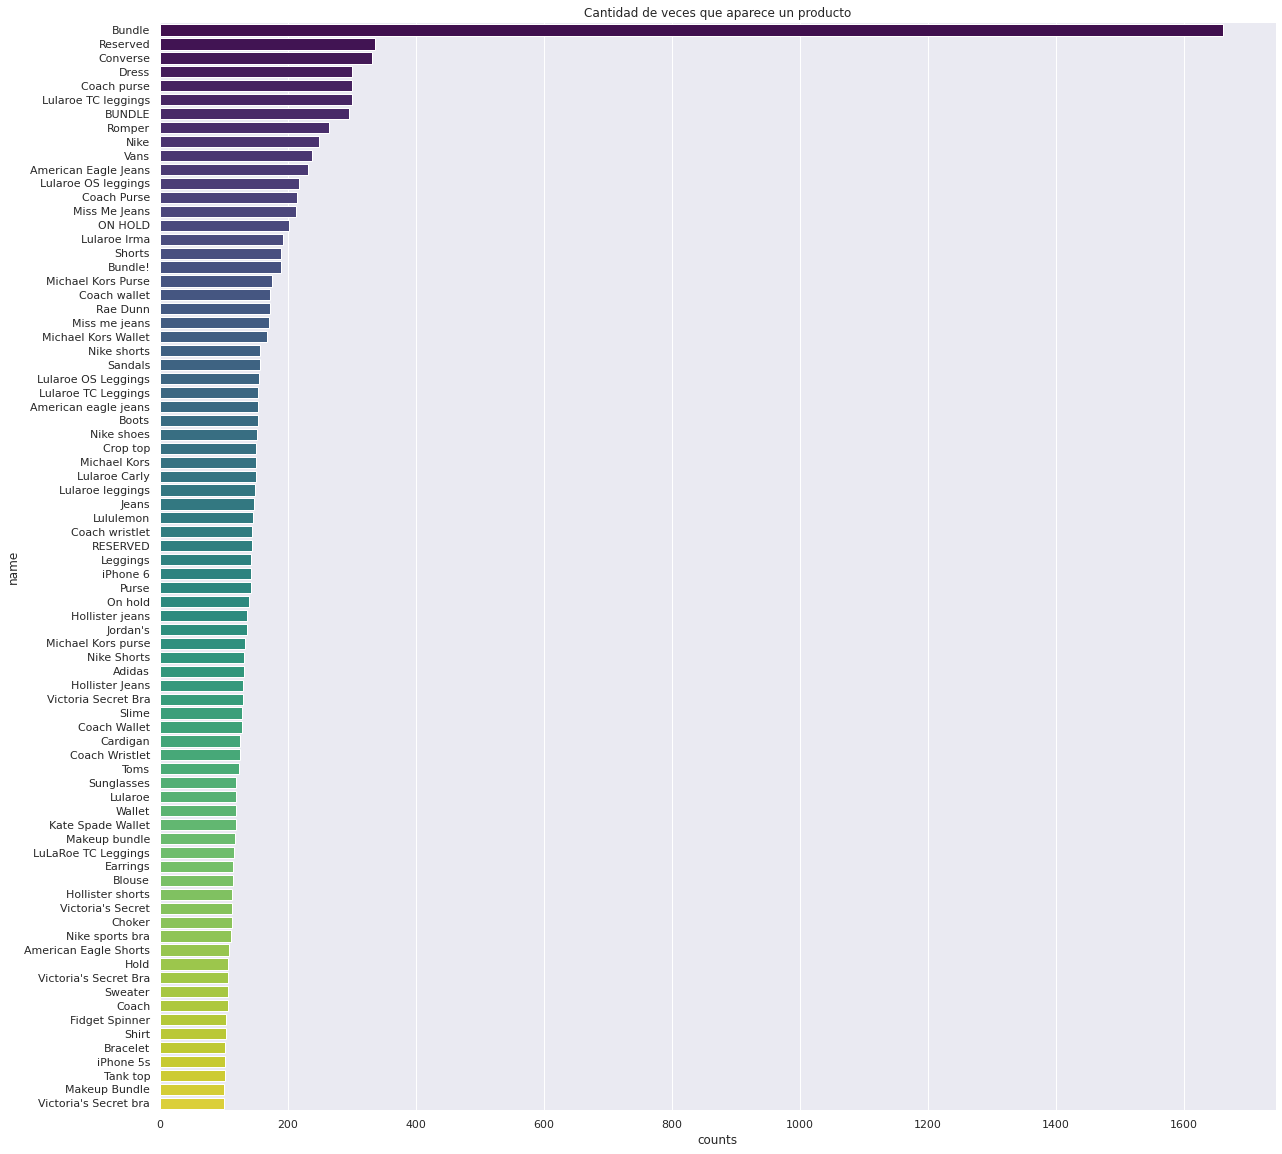

In [ ]:
fig, ax = plt.subplots(figsize=(20,20),nrows=1)
sns.barplot(data=df_name_counts[df_name_counts['counts'] > 100], y='name', x='counts', palette="viridis", ax=ax, orient='h')
ax.set_title('Cantidad de veces que aparece un producto')
sns.despine(left=True, bottom=True)
plt.show()

## Preprocesamiento

In [ ]:
# Colocaremos las categorías y las separaremos por categoría general, sub-categoría 1 y sub-categoría 2
def split_categories(df, categories):
    df_copy = df.copy()
    
    # hacemos split de la columna category_name en 3
    categories[['general_category','subcategory_1', 'subcategory_2']] = categories['category_name'].str.split('/',n=2,expand=True)
    
    # lo pasamos a df
    df_train_splited_categories = pd.merge(categories,
                 df_copy,
                left_on='category_id', right_on='category_name')

    
    # dropeamos las columnas que sobran
    df_train_splited_categories = df_train_splited_categories.drop(['category_id',
                                 'category_name_x',
                                 'category_name_y'], axis=1)
    # retornamos el nuevo dataset
    return df_train_splited_categories

In [ ]:
# juntaremos las dos columnas de review_title y review_text
def join_text_columns(df):
    df_copy = df.copy()
    df_copy["name_and_description_brand"] = df_copy["name"] + " " + df_copy["item_description"]+  " " + df_copy["brand_name"] 
    df_copy.drop(['name','item_description', 'brand_name'], axis=1, inplace=True)

    return df_copy

In [ ]:
# pasaremos las columnas categóricas a dummy
def get_dummies_categories(df):
    df_copy = df.copy()
    df_copy = pd.get_dummies(df_copy, columns=['general_category','subcategory_1', 
                                               'subcategory_2', 'item_condition_id'])    

    return df_copy

In [ ]:
# esta función reduce la cantidad de categorías en las nuevas variables creadas

# https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b sacada de acá
from collections import Counter
def cumulatively_categorise(column,threshold=0.95,return_categories_list=True):
    #Find the threshold value using the percentage and number of instances in the column
    threshold_value=int(threshold*len(column))
    
    #Initialise an empty list for our new minimised categories
    categories_list=[]
    
    #Initialise a variable to calculate the sum of frequencies
    s=0
    
    #Create a counter dictionary of the form unique_value: frequency
    counts=Counter(column)

    #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
    for i,j in counts.most_common():
        #Add the frequency to the global sum
        s+=dict(counts)[i]
        #Append the category name to the list
        categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
        if s>=threshold_value:
            break
       
    #Append the category Other to the list
    categories_list.append('Other')

    #Replace all instances not in our new categories by Other  
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')

    #Return transformed column and unique values if return_categories=True
    if(return_categories_list):
        return new_column,categories_list

    #Return only the transformed column if return_categories=False
    else:
        return new_column

def reduce_categories(df):
    df_copy = df.copy()
    transformed_column = cumulatively_categorise(df_copy['general_category'],
                                             return_categories_list=False,
                                            threshold=0.80)
    
    df_copy['general_category'] = transformed_column

    transformed_column = cumulatively_categorise(df_copy['subcategory_1'],
                                             return_categories_list=False,
                                            threshold=0.35)
    
    df_copy['subcategory_1'] = transformed_column

    transformed_column = cumulatively_categorise(df_copy['subcategory_2'],
                                             return_categories_list=False,
                                            threshold=0.25)
    df_copy['subcategory_2'] = transformed_column
    
    return df_copy

In [ ]:
# preprocesamiento de columnas de texto
def pre_processing_text(df):
    df_copy = df.copy()
    
    # quitamos signos de puntuación 
    df_copy["name_and_description_brand"] = df_copy['name_and_description_brand'].str.replace('[^\w\s]',' ')
    
    # pasamos a lowercase
    df_copy['name_and_description_brand'] = df_copy['name_and_description_brand'].str.lower()
    
    # quitamos stopwords
    stop = set(stopwords.words('english'))
    df_copy['name_and_description_brand'] = df_copy['name_and_description_brand'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
    
    return df_copy    


tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters
lemmatizer = WordNetLemmatizer()

#stop-words: el vectorizador ya las remueve pero para mostrar las palabras más frecuente tiene sentido activarlo
remove_stops_here = False

def my_pre_processer(text, debug = False):
    results = []
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        token_pro = lemmatizer.lemmatize(clean_token) 
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results

# vectorización tf-id, retorna los word vectors + los conjuntos de train y validacion
# X, y -> dataset
def vectorize_tfidvectorizer_data(X, y, kaggle=False):
    max_features = 100
    max_df = 0.75
    min_df = 20
    ngram_max = 1
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    
    vectorizer = TfidfVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                                      binary=False, use_idf=True, smooth_idf=True, norm=None, ngram_range=(1, ngram_max))


    tfid_train = vectorizer.fit_transform(X_train['name_and_description_brand']) # fit + transform datos de train
    tfid_val = vectorizer.transform(X_val['name_and_description_brand']) # datos de validacion
    
    return tfid_train, tfid_val, X_train, y_train, X_val, y_val

# a las word vectors que acabamos de extraer, debemos unirlas con las otras características que ya trabajamos
def join_features(tfid_train, tfid_val, X_train, X_val):
    # pasamos las word vectors a matriz para poder trabajarlas
    tfid_train = tfid_train.todense()
    tfid_val = tfid_val.todense()
    
    # juntamos todo (las word vectors con todas las columnas que no sean name_and_description_brand)
    X_train = np.column_stack((tfid_train, X_train.drop('name_and_description_brand', axis=1).to_numpy()))
    X_val = np.column_stack((tfid_val, X_val.drop('name_and_description_brand', axis=1).to_numpy()))

    return X_train, X_val

In [ ]:
# función para procesar todo el dataset y dejarlos listos para usarlos en los modelos
def process_dataset(df):
    # primero hacemos split de las categorías
    df = split_categories(df_train, categories)

    # juntamos las dos columnas de texto
    df = join_text_columns(df)
    
    # reducimos la cantidad de categorias
    df = reduce_categories(df)
    
    # obtenemos dummies de columnas categóricas
    df = get_dummies_categories(df)
    
    # procesamos la columna name_and_description_brand (stopwords, signos de puntuación, lowercase, etc)
    df = pre_processing_text(df)
    
    # quitamos columna target del dataset completo y la dejamos aparte
    y = df['price']
    X = df.drop('price', axis=1)

    # vectorizamos la data de texto (name_and_description_brand)
    tfid_train, tfid_val, X_train, y_train, X_val, y_val = vectorize_tfidvectorizer_data(X, y)
    
    # juntamos todo 
    X_train, X_val = join_features(tfid_train, tfid_val, X_train, X_val)
    
    # retornamos para aplicar los modelos
    return X_train, X_val, y_train, y_val 

In [ ]:
X_train, X_val, y_train, y_val = process_dataset(df_train)

In [ ]:
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)

X,y Train Shapes: (885721, 128) (885721,)
X,y Val Shapes: (221431, 128) (221431,)


In [ ]:
X_train = csr_matrix(X_train)
X_val = csr_matrix(X_val)

## Modelamiento

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(X_train, y_train, X_val, y_val):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predicciones para train
    y_train_pred = lr.predict(X_train)
    
    # scores train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    print(f' R^2 train score: {r2_train}')
    print(f' RMSE train score: {rmse_train}')
    print("")

    # predicciones para validacion
    y_val_pred = lr.predict(X_val)
    
    # scores validación
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
    
    print(f' R^2 validación score: {r2_val}')
    print(f' RMSE validación score: {rmse_val}')
    print("")

    return [(r2_train, rmse_train), (r2_val, rmse_val)]

In [ ]:
linear_regression(X_train, y_train, X_val, y_val)

 R^2 train score: 0.12997336271074678
 RMSE train score: 34668.91090278762

 R^2 validación score: 0.12499796312425182
 RMSE validación score: 35621.40277628732



[(0.12997336271074678, 34668.91090278762),
 (0.12499796312425182, 35621.40277628732)]

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(X_train, y_train, X_val, y_val, alpha=1.0):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # predicciones para train
    y_train_pred = lasso.predict(X_train)
    
    # scores train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    print(f' R^2 train score: {r2_train}')
    print(f' RMSE train score: {rmse_train}')
    print("")

    # predicciones para validacion
    y_val_pred = lasso.predict(X_val)
    
    # scores validación
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
    
    print(f' R^2 validación score: {r2_val}')
    print(f' RMSE validación score: {rmse_val}')
    print("")

    return [(r2_train, rmse_train), (r2_val, rmse_val)]

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(X_train, y_train, X_val, y_val, alpha=1.0):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # predicciones para train
    y_train_pred = ridge.predict(X_train)
    
    # scores train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    print(f' R^2 train score: {r2_train}')
    print(f' RMSE train score: {rmse_train}')
    print("")

    # predicciones para validacion
    y_val_pred = ridge.predict(X_val)
    
    # scores validación
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))
    
    print(f' R^2 validación score: {r2_val}')
    print(f' RMSE validación score: {rmse_val}')
    print("")

    return [(r2_train, rmse_train), (r2_val, rmse_val)]

## Con test kaggle

In [ ]:
df_test

,name,item_condition_id,category_name,brand_name,shipping,item_description
train_id,,,,,,
121326,Levana Jena baby monitor,Good,671,unknown,0,Used less than a year. Great condition. Smoke ...
1437618,Belle Dress BUNDLE,Good,633,Disney,0,"Beautiful Belle Dress! Size 2/4, but is defini..."
899441,Michael Kors Wallet,Good,1276,Michael Kors,0,"in great shape, hardly any ware!"
452401,Girls 5T Skirt set Free Shipping,Like New,638,unknown,1,Barely worn No holes or stains This is a 2pc s...
1225939,Cross silver stamped 925 necklace,New,1181,unknown,1,24 inches
...,...,...,...,...,...,...
1079099,Deadpool back in black set,New,988,unknown,1,"Deadpool back in black 1 1st print, variant, a..."
1135252,Black Shorts With Brown Belt,Good,1139,unknown,1,Shorts from forever21. Size 28
477391,Banana Republic pullover sweater,Like New,1236,Banana Republic,0,Cream


In [ ]:
# función para procesar todo el dataset y dejarlos listos para usarlos en los modelos
def process_dataset_kaggle_submission(df_train, df_test):
    # primero hacemos split de las categorías
    df_train = split_categories(df_train, categories)
    df_test = split_categories(df_test, categories)

    # juntamos las dos columnas de texto
    df_train = join_text_columns(df_train)
    df_test = join_text_columns(df_test)

    # reducimos la cantidad de categorias
    df_train = reduce_categories(df_train)
    df_test = reduce_categories(df_test)

    # obtenemos dummies de columnas categóricas
    df_train = get_dummies_categories(df_train)
    df_test = get_dummies_categories(df_test)

    # procesamos la columna name_and_description_brand (stopwords, signos de puntuación, lowercase, etc)
    df_train = pre_processing_text(df_train)
    df_test = pre_processing_text(df_test)

    # quitamos columna target del dataset completo y la dejamos aparte
    y_train = df_train['price']
    X_train = df_train.drop('price', axis=1)
    
    max_features = 100
    max_df = 0.75
    min_df = 20
    ngram_max = 1
    
    # vectorizamos la data de texto (name_and_description_brand)
    vectorizer = TfidfVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                                      binary=False, use_idf=True, smooth_idf=True, norm=None, ngram_range=(1, ngram_max))

    tfid_train = vectorizer.fit_transform(X_train['name_and_description_brand']) # fit + transform datos de train
    tfid_test = vectorizer.transform(df_test['name_and_description_brand']) # datos de validacion
    
    # pasamos las word vectors a matriz para poder trabajarlas
    tfid_train = tfid_train.todense()
    tfid_test = tfid_test.todense()
    
    # juntamos todo (las word vectors con todas las columnas que no sean name_and_description_brand)
    X_train = np.column_stack((tfid_train, X_train.drop('name_and_description_brand', axis=1).to_numpy()))
    X_test = np.column_stack((tfid_test, df_test.drop('name_and_description_brand', axis=1).to_numpy()))
    
    # retornamos para aplicar los modelos
    return X_train, X_test, y_train

In [ ]:
X_train, X_test, y_train = process_dataset_kaggle_submission(df_train, df_test)

In [ ]:
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# predicciones para validacion
y_val_pred = lr.predict(X_test)

In [ ]:
df_final=pd.DataFrame()
df_final['train_id']=df_test.reset_index()['train_id']
df_final['price']=y_val_pred
# df_final
df_final.to_csv('pred_test.csv', index=None)

## Conclusiones

* Sin realizar una hiperparametrización y un preprocesamiento no tan complejo, se puede obtener un baseline más o menos decente
* El trabajo con el modelado y el preprocesamiento puede mejorarse mucho más, por ejemplo en el preprocesamiento se pudo haber escogido otras formas de vectorizar el texto, tratar de otras maneras los datos nulos en la marca, crear nuevas columnas que puedan aportar más al modelo, etc. En el modelado, se pudo haber probado con otras técnicas para poder realizar una mejor selección de modelos, tales como cross-validation. Además, por temas de tiempo, no se pudo probar con los otros tipos de penalizaciones de regresión lineal con norma L1 y L2 (Lasso y Ridge), por lo que haber realizado un pipeline más extenso para la selección de modelos para escoger alphas óptimos que tomen estos regularizadores fue un trabajo que faltó realizar y que probablemente pudo haber mejorado los resultados obtenidos solo con regresión lineal clásica